In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
results=pd.read_csv('results.csv')
results_r2_minus=pd.read_csv('results_r2_minus.csv')
problmatic_para=pd.read_csv('problmatic_para.csv')

In [65]:
results.columns

Index(['Unnamed: 0', 'beta', 'gamma', 'alpha', 'p_0', 'p_k', 'p_p', 'y_mean',
       'y_std', 'n_unique', 'r_hat', 'p0_nb', 'pk_nb', 'zero_inflated',
       'k_inflated', 'POISSON_MSE', 'POISSON_MAE', 'POISSON_R2', 'POISSON_LLF',
       'POISSON_AIC', 'POISSON_BIC', 'NEGATIVE_BINOMIAL_MSE',
       'NEGATIVE_BINOMIAL_MAE', 'NEGATIVE_BINOMIAL_R2',
       'NEGATIVE_BINOMIAL_LLF', 'NEGATIVE_BINOMIAL_AIC',
       'NEGATIVE_BINOMIAL_BIC', 'ZK_HURDLE_POISSON_MSE',
       'ZK_HURDLE_POISSON_MAE', 'ZK_HURDLE_POISSON_R2',
       'ZK_HURDLE_POISSON_LLF', 'ZK_HURDLE_POISSON_AIC',
       'ZK_HURDLE_POISSON_BIC', 'ZINB_MSE', 'ZINB_MAE', 'ZINB_R2', 'ZINB_LLF',
       'ZINB_AIC', 'ZINB_BIC', 'ZIP_MSE', 'ZIP_MAE', 'ZIP_R2', 'ZIP_LLF',
       'ZIP_AIC', 'ZIP_BIC', 'ZKINB_MSE', 'ZKINB_MAE', 'ZKINB_R2', 'ZKINB_LLF',
       'ZKINB_AIC', 'ZKINB_BIC', 'ZKIP_MSE', 'ZKIP_MAE', 'ZKIP_R2', 'ZKIP_LLF',
       'ZKIP_AIC', 'ZKIP_BIC'],
      dtype='object')

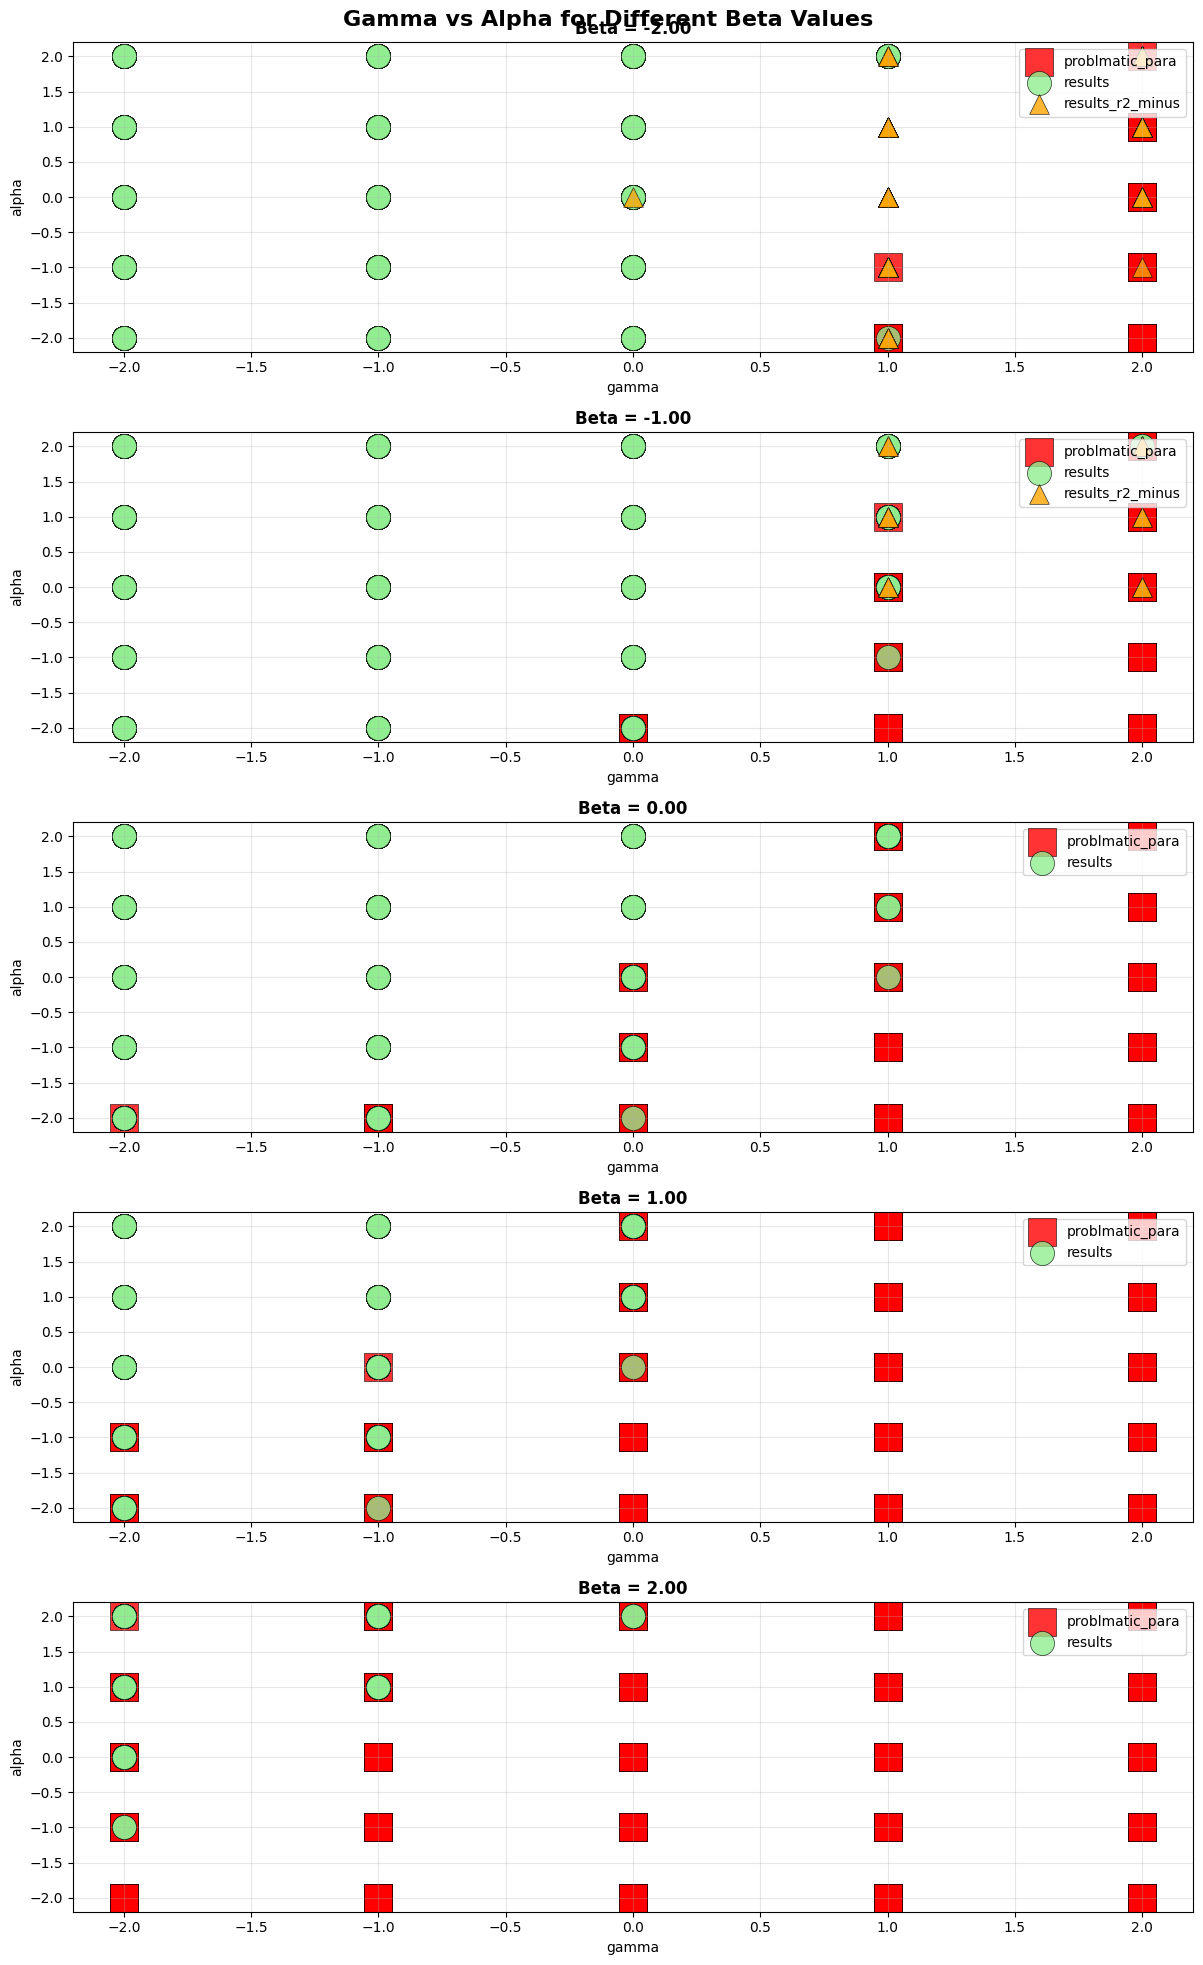

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with subplots
fig, axes = plt.subplots(5, 1, figsize=(12, 20))
fig.subplots_adjust(hspace=0.5)

# Colors for different datasets
colors = ['lightgreen', 'red', 'orange']  # results, problmatic_para, results_r2_minus
labels = ['results', 'problmatic_para', 'results_r2_minus']
markers = ['o', 's', '^']  # Different markers for each dataset
sizes = [400, 300, 200]  # Sizes - make middle one largest to avoid complete hiding

betas = np.linspace(-2, 2, 5)

for idx, beta in enumerate(betas):
    ax = axes[idx]
    
    # Plot in reverse order so larger markers don't hide smaller ones completely
    # Plot results_r2_minus first (bottom layer)
    if 'problmatic_para' in globals() and not problmatic_para.empty:
        x = problmatic_para.loc[problmatic_para['beta']==beta, 'gamma']
        y = problmatic_para.loc[problmatic_para['beta']==beta, 'alpha']
        if not x.empty:
            ax.scatter(x, y, c=colors[1], label=labels[1], 
                      marker=markers[1], s=sizes[0], alpha=0.8, edgecolor='black', linewidth=0.5)
    
    
    # Plot problmatic_para second (middle layer)
    if 'results' in globals() and not results.empty:
        x = results.loc[results['beta']==beta, 'gamma']
        y = results.loc[results['beta']==beta, 'alpha']
        if not x.empty:
            ax.scatter(x, y, c=colors[0], label=labels[0], 
                      marker=markers[0], s=sizes[1], alpha=0.8, edgecolor='black', linewidth=0.5)
    
    # Plot results last (top layer)
    if 'results_r2_minus' in globals() and not results_r2_minus.empty:
        x = results_r2_minus.loc[results_r2_minus['beta']==beta, 'gamma']
        y = results_r2_minus.loc[results_r2_minus['beta']==beta, 'alpha']
        if not x.empty:
            ax.scatter(x, y, c=colors[2], label=labels[2], 
                      marker=markers[2], s=sizes[2], alpha=0.8, edgecolor='black', linewidth=0.5)
    
    
    # Add titles and labels
    ax.set_title(f"Beta = {beta:.2f}", fontsize=12, fontweight='bold')
    ax.set_xlabel("gamma")
    ax.set_ylabel("alpha")
    
    # Add grid for better readability
    ax.grid(True, alpha=0.3)
    
    # Add legend
    ax.legend(loc='best')

# Optional: Add a main title
fig.suptitle('Gamma vs Alpha for Different Beta Values', fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

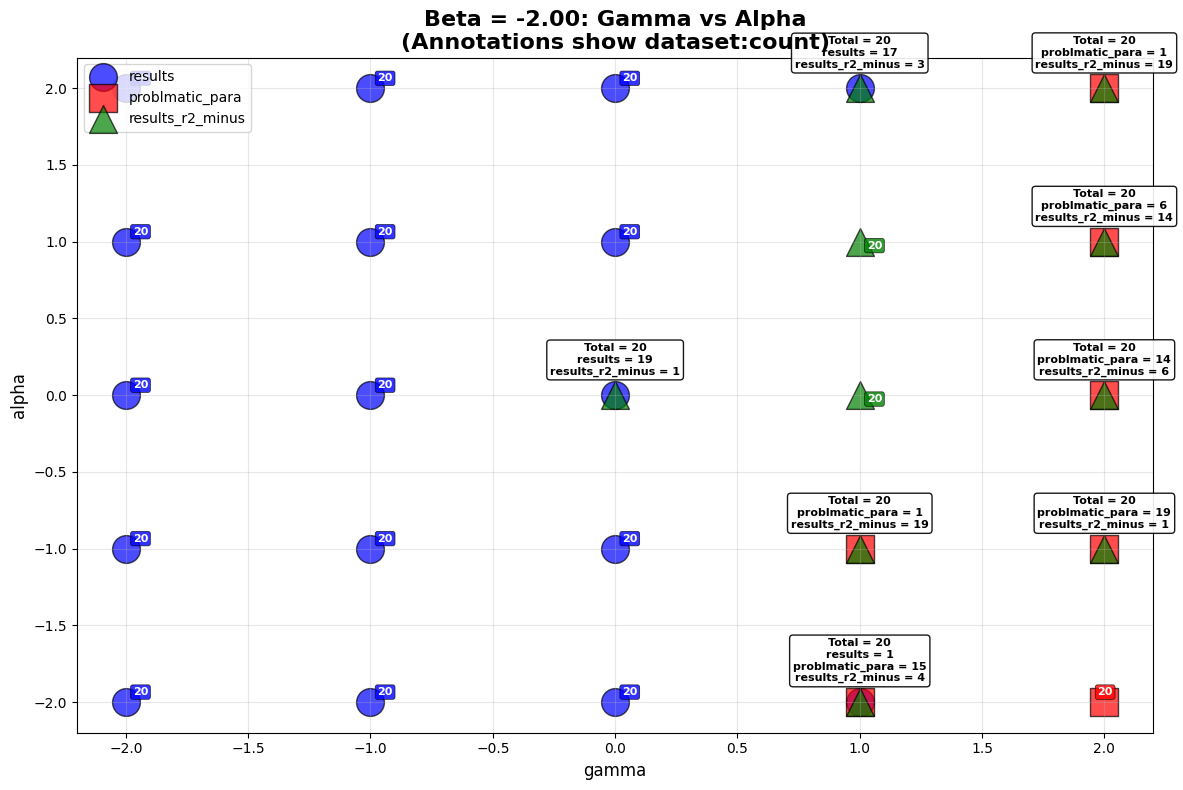

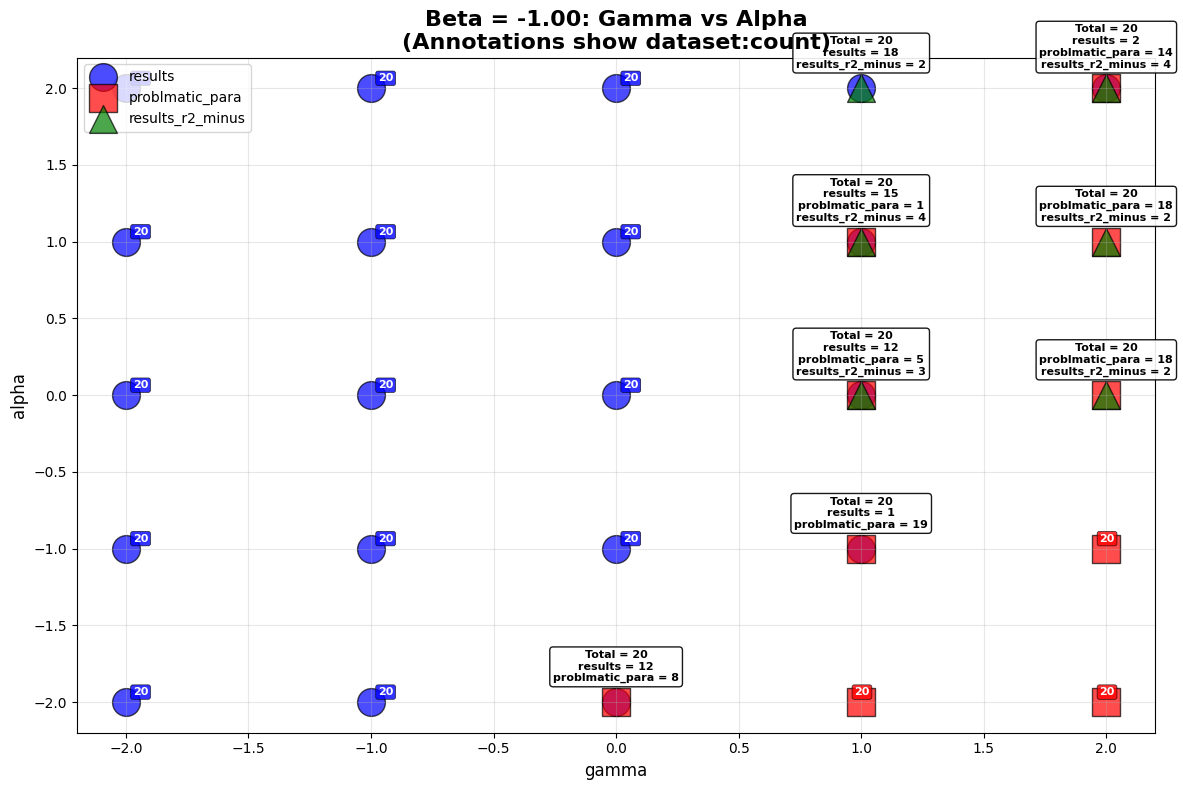

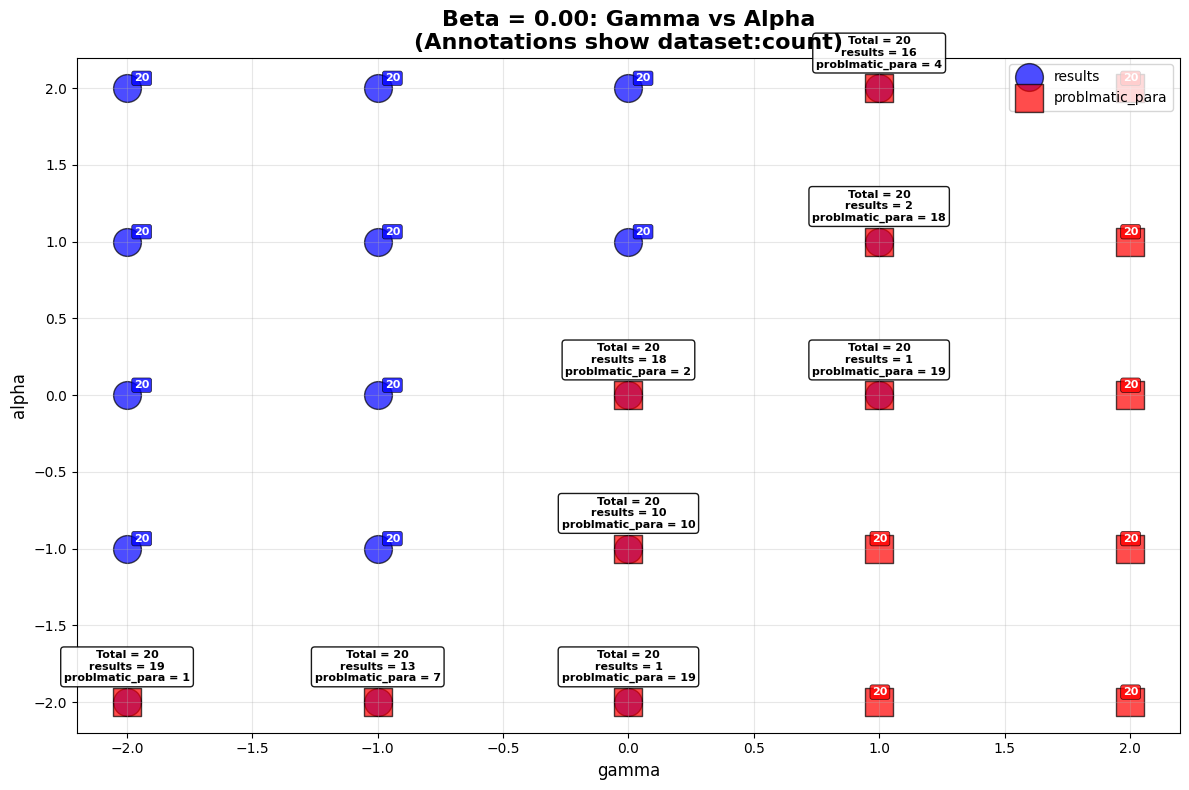

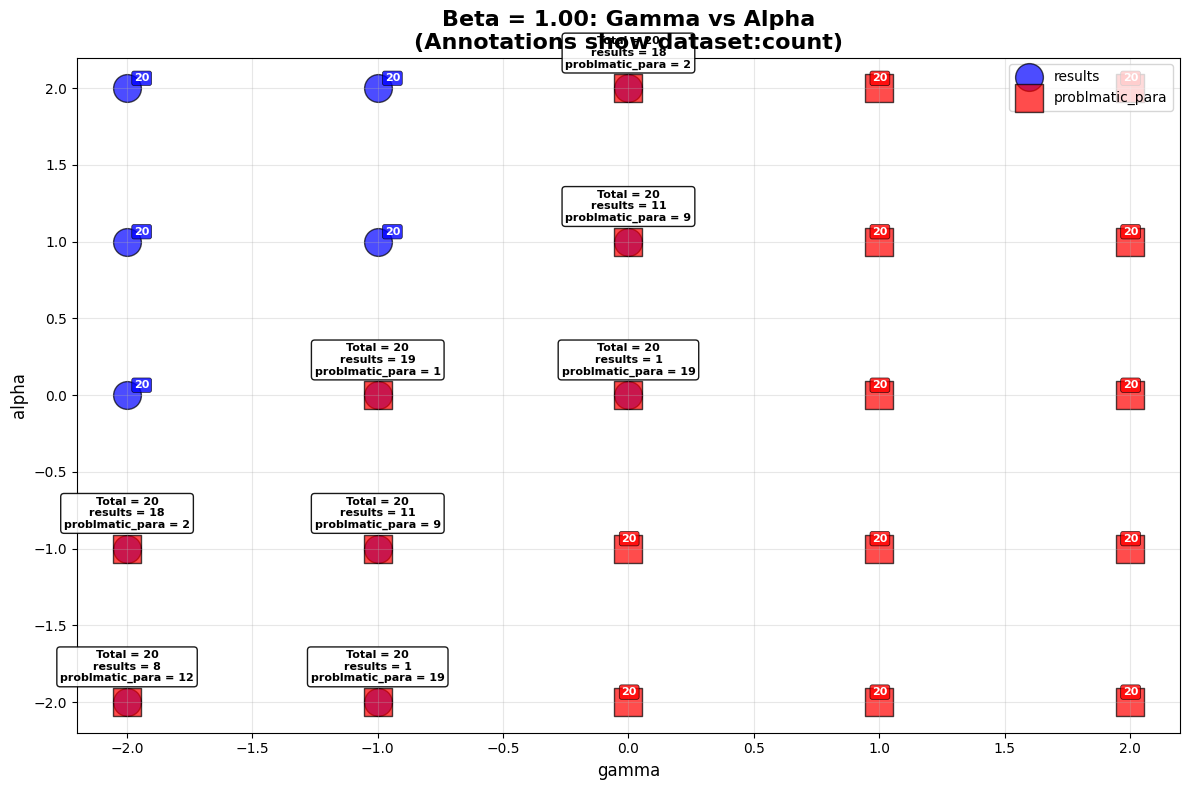

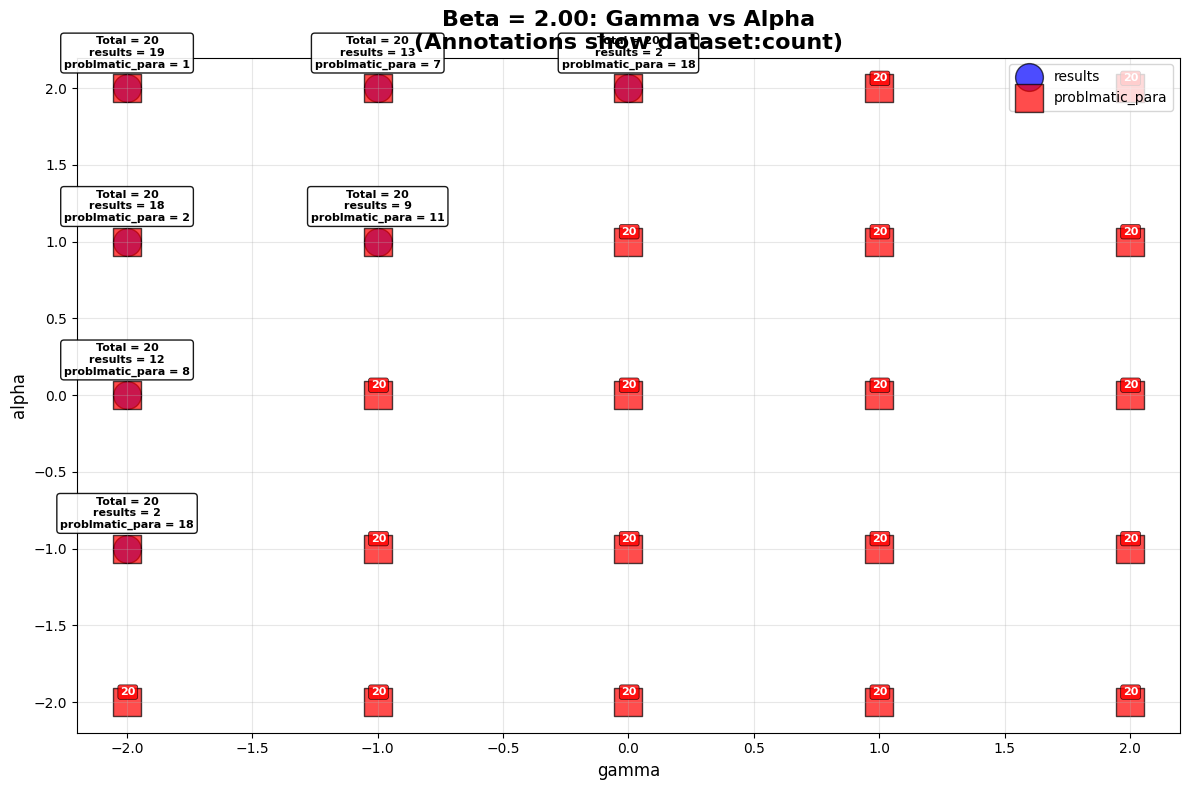

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

betas = np.linspace(-2, 2, 5)

# Different offsets for each dataset to prevent label overlap
offsets = {
    'results': (5, 5),
    'problmatic_para': (-5, 5),
    'results_r2_minus': (5, -5)
}

# Different colors for annotations
annotation_colors = {
    'results': 'darkblue',
    'problmatic_para': 'darkred',
    'results_r2_minus': 'darkgreen'
}

for beta in betas:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    datasets_info = [
        (results, 'results', 'blue', 'o'),
        (problmatic_para, 'problmatic_para', 'red', 's'),
        (results_r2_minus, 'results_r2_minus', 'green', '^')
    ]
    
    all_points_info = []  # Store all points for checking overlaps between datasets
    
    for df, dataset_name, color, marker in datasets_info:
        if not df.empty:
            x = df.loc[df['beta']==beta, 'gamma']
            y = df.loc[df['beta']==beta, 'alpha']
            
            if not x.empty:
                x_vals = x.values
                y_vals = y.values
                
                # Count occurrences within this dataset
                point_counter = Counter(zip(x_vals, y_vals))
                unique_points = list(point_counter.keys())
                counts = list(point_counter.values())
                
                unique_x = [p[0] for p in unique_points]
                unique_y = [p[1] for p in unique_points]
                
                # Store for cross-dataset comparison
                for (x_val, y_val), count in point_counter.items():
                    all_points_info.append({
                        'x': x_val, 'y': y_val, 
                        'dataset': dataset_name,
                        'count': count,
                        'color': color
                    })
                
                # Plot points
                ax.scatter(unique_x, unique_y, c=color, marker=marker, 
                         label=dataset_name, alpha=0.7, 
                         s=[400], 
                         edgecolor='black', linewidth=1)
    
    # Now add annotations for all points
    # Group points by position to find overlaps between different datasets
    position_groups = {}
    for point in all_points_info:
        pos_key = (round(point['x'], 6), round(point['y'], 6))  # Rounded for grouping
        if pos_key not in position_groups:
            position_groups[pos_key] = []
        position_groups[pos_key].append(point)
    
    # Add annotations, handling overlaps between datasets
    for pos_key, points_at_pos in position_groups.items():
        x_val, y_val = pos_key
        
        if len(points_at_pos) == 1:
            # Single dataset at this point
            point = points_at_pos[0]
            if point['count'] > 1:
                offset = offsets.get(point['dataset'], (5, 5))
                bbox_props = dict(boxstyle="round,pad=0.2", 
                                 fc=point['color'], ec="black", 
                                 lw=0.5, alpha=0.8)
                ax.annotate(f"{point['count']}", 
                          xy=(x_val, y_val), xytext=offset,
                          textcoords='offset points', fontsize=8,
                          fontweight='bold', color='white',
                          bbox=bbox_props)
        else:
            # Multiple datasets overlap at same point
            total_count = sum(p['count'] for p in points_at_pos)
            datasets_str = "\n".join([f"{p['dataset'][:]} = {p['count']}" 
                                   for p in points_at_pos])
            
            # Create a multi-color annotation or combined annotation
            bbox_props = dict(boxstyle="round,pad=0.3", 
                             fc='white', ec="black", lw=1, alpha=0.9)
            ax.annotate(f"Total = {total_count}\n{datasets_str}", 
                      xy=(x_val, y_val), xytext=(0, 15),
                      textcoords='offset points', fontsize=8,
                      fontweight='bold', color='black',
                      ha='center', bbox=bbox_props)
    
    ax.set_title(f"Beta = {beta:.2f}: Gamma vs Alpha\n(Annotations show dataset:count)", 
                fontsize=16, fontweight='bold')
    ax.set_xlabel("gamma", fontsize=12)
    ax.set_ylabel("alpha", fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best')
    
    plt.tight_layout()
    plt.show()

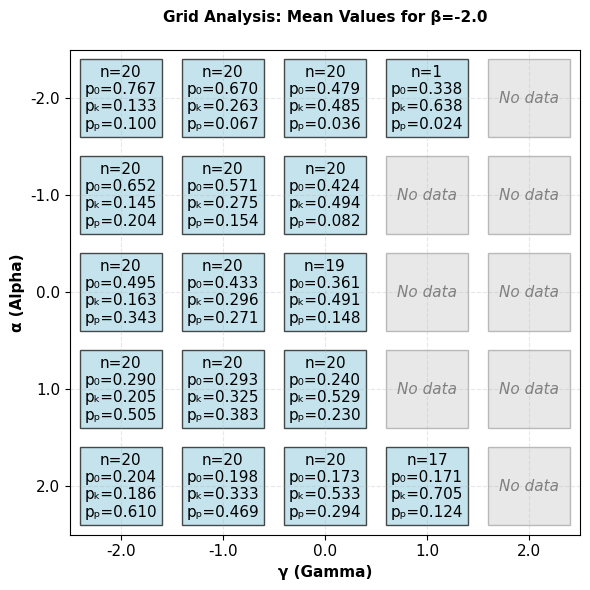

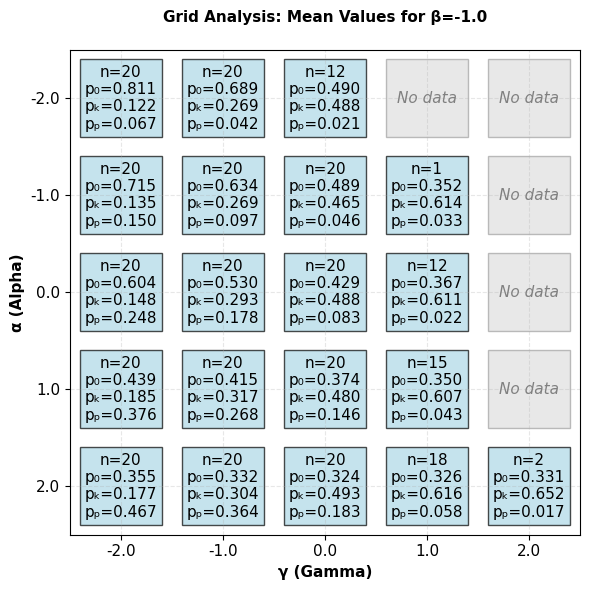

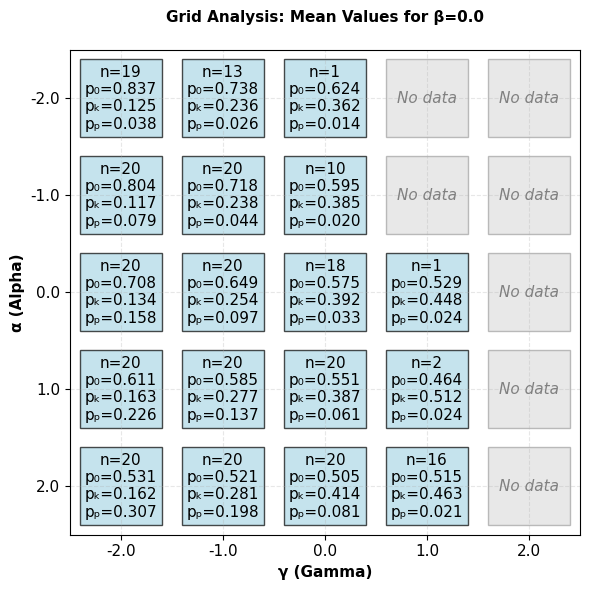

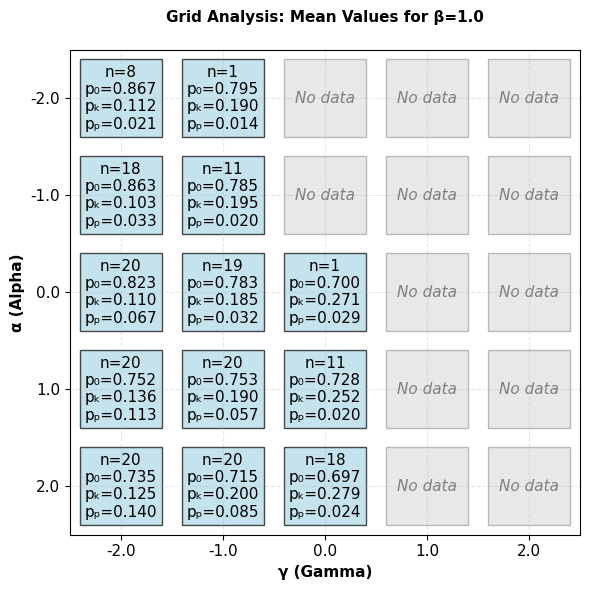

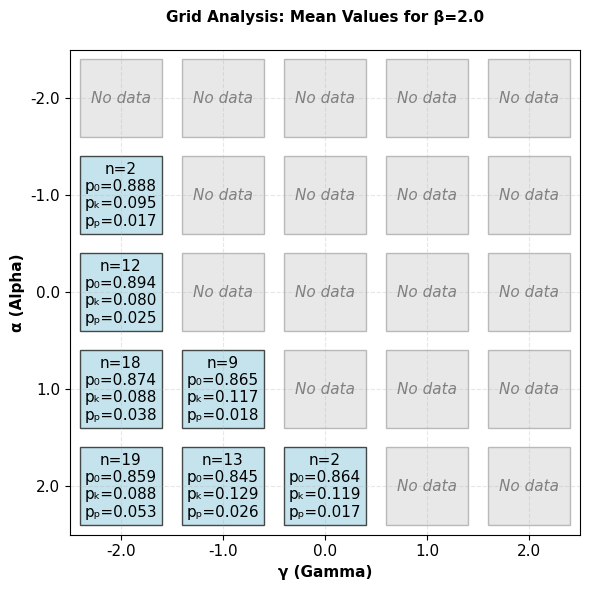

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dfp=results

# Generate alpha, beta, and gamma values
beta_values = np.linspace(-2, 2, 5)  # Renamed to avoid conflict
alphas = np.linspace(-2, 2, 5)
gammas = np.linspace(-2, 2, 5)

sizz = 6  # Increased size for better readability

# Create a figure for each beta value
for beta_idx, beta_val in enumerate(beta_values):
    fig, ax = plt.subplots(figsize=(sizz, sizz))
    
    # Create a grid
    for i, alpha in enumerate(alphas):
        for j, gamma in enumerate(gammas):
            x_pos = j  # gamma on x-axis
            y_pos = len(alphas) - 1 - i  # alpha on y-axis (inverted for correct orientation)
            
            # Fixed the mask - using beta_val instead of beta
            mask = (dfp['alpha'] == alpha) & (dfp['gamma'] == gamma) & (dfp['beta'] == beta_val)
            filtered_data = dfp.loc[mask]
            
            if not filtered_data.empty:
                # Calculate means
                mean_p0 = np.mean(filtered_data['p_0'])
                mean_pk = np.mean(filtered_data['p_k'])
                mean_pp = np.mean(filtered_data['p_p'])
                count = len(filtered_data)
                
                # Create annotation box
                text = f"n={count}\n"
                text += f"p₀={mean_p0:.3f}\n"
                text += f"pₖ={mean_pk:.3f}\n"
                text += f"pₚ={mean_pp:.3f}"
                
                # Add background rectangle
                rect = plt.Rectangle((x_pos - 0.4, y_pos - 0.4), 0.8, 0.8,
                                    facecolor='lightblue', edgecolor='black',
                                    alpha=0.7, linewidth=1)
                ax.add_patch(rect)
                
                # Add text with adjusted font size
                ax.text(x_pos, y_pos, text,
                       ha='center', va='center',
                       fontsize=sizz+5, fontweight='normal',  # Adjusted for better fit
                       linespacing=1.2)
            else:
                # No data
                rect = plt.Rectangle((x_pos - 0.4, y_pos - 0.4), 0.8, 0.8,
                                    facecolor='lightgray', edgecolor='gray',
                                    alpha=0.5, linewidth=1)
                ax.add_patch(rect)
                ax.text(x_pos, y_pos, "No data",
                       ha='center', va='center',
                       fontsize=sizz+5, color='gray', style='italic')
    
    # Set up the plot
    ax.set_xlim(-0.5, len(gammas) - 0.5)
    ax.set_ylim(-0.5, len(alphas) - 0.5)
    ax.set_xticks(np.arange(len(gammas)))
    ax.set_yticks(np.arange(len(alphas)))
    ax.set_xticklabels([f'{g:.1f}' for g in gammas], fontsize=sizz+5)
    ax.set_yticklabels([f'{a:.1f}' for a in alphas[::-1]], fontsize=sizz+5)  # Reversed for correct orientation
    ax.set_xlabel('γ (Gamma)', fontsize=sizz+5, fontweight='bold')
    ax.set_ylabel('α (Alpha)', fontsize=sizz+5, fontweight='bold')
    ax.set_title(f'Grid Analysis: Mean Values for β={beta_val:.1f}',
                fontsize=sizz+5, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.show()

In [70]:
mean_p0=np.mean(results.loc[(results['alpha']==-1) & (results['gamma']==-1), 'zero_inflated'])
mean_pk=np.mean(results.loc[(results['alpha']==-1) & (results['gamma']==-1), 'p_k'])
mean_pp=np.mean(results.loc[(results['alpha']==-1) & (results['gamma']==-1), 'p_p'])
mean_p0, mean_pk, mean_pp

(np.float64(1.0),
 np.float64(0.2507042253521127),
 np.float64(0.08625083836351437))

In [ ]:
Index(['Unnamed: 0', 'beta', 'gamma', 'alpha', 'p_0', 'p_k', 'p_p', 'y_mean',
       'y_std', 'n_unique', 'r_hat', 'p0_nb', 'pk_nb', 'zero_inflated',
       'k_inflated', 'POISSON_MSE', 'POISSON_MAE', 'POISSON_R2', 'POISSON_LLF',
       'POISSON_AIC', 'POISSON_BIC', 'NEGATIVE_BINOMIAL_MSE',
       'NEGATIVE_BINOMIAL_MAE', 'NEGATIVE_BINOMIAL_R2',
       'NEGATIVE_BINOMIAL_LLF', 'NEGATIVE_BINOMIAL_AIC',
       'NEGATIVE_BINOMIAL_BIC', 'ZK_HURDLE_POISSON_MSE',
       'ZK_HURDLE_POISSON_MAE', 'ZK_HURDLE_POISSON_R2',
       'ZK_HURDLE_POISSON_LLF', 'ZK_HURDLE_POISSON_AIC',
       'ZK_HURDLE_POISSON_BIC', 'ZINB_MSE', 'ZINB_MAE', 'ZINB_R2', 'ZINB_LLF',
       'ZINB_AIC', 'ZINB_BIC', 'ZIP_MSE', 'ZIP_MAE', 'ZIP_R2', 'ZIP_LLF',
       'ZIP_AIC', 'ZIP_BIC', 'ZKINB_MSE', 'ZKINB_MAE', 'ZKINB_R2', 'ZKINB_LLF',
       'ZKINB_AIC', 'ZKINB_BIC', 'ZKIP_MSE', 'ZKIP_MAE', 'ZKIP_R2', 'ZKIP_LLF',
       'ZKIP_AIC', 'ZKIP_BIC'],
      dtype='object')

In [2]:
results_H=pd.read_csv('results_H.csv')

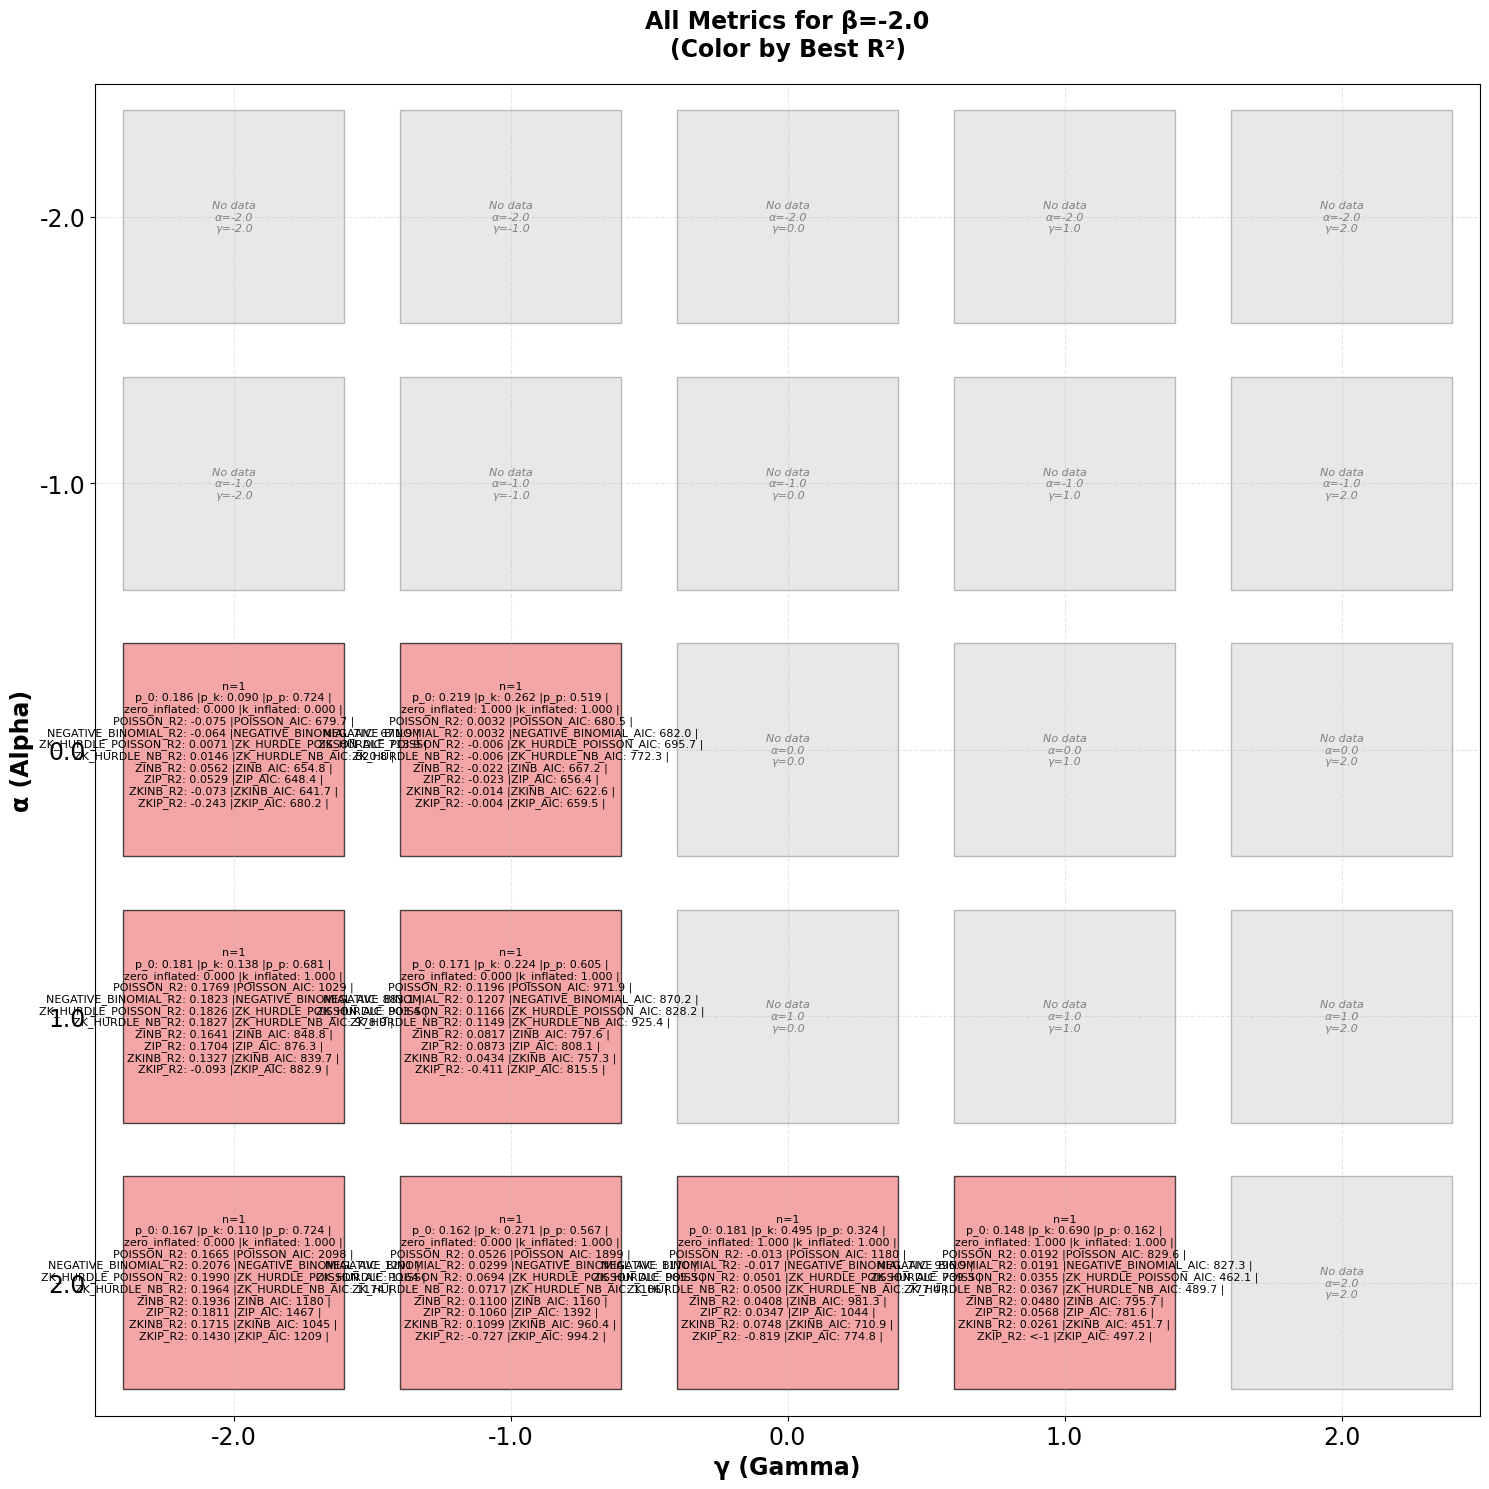

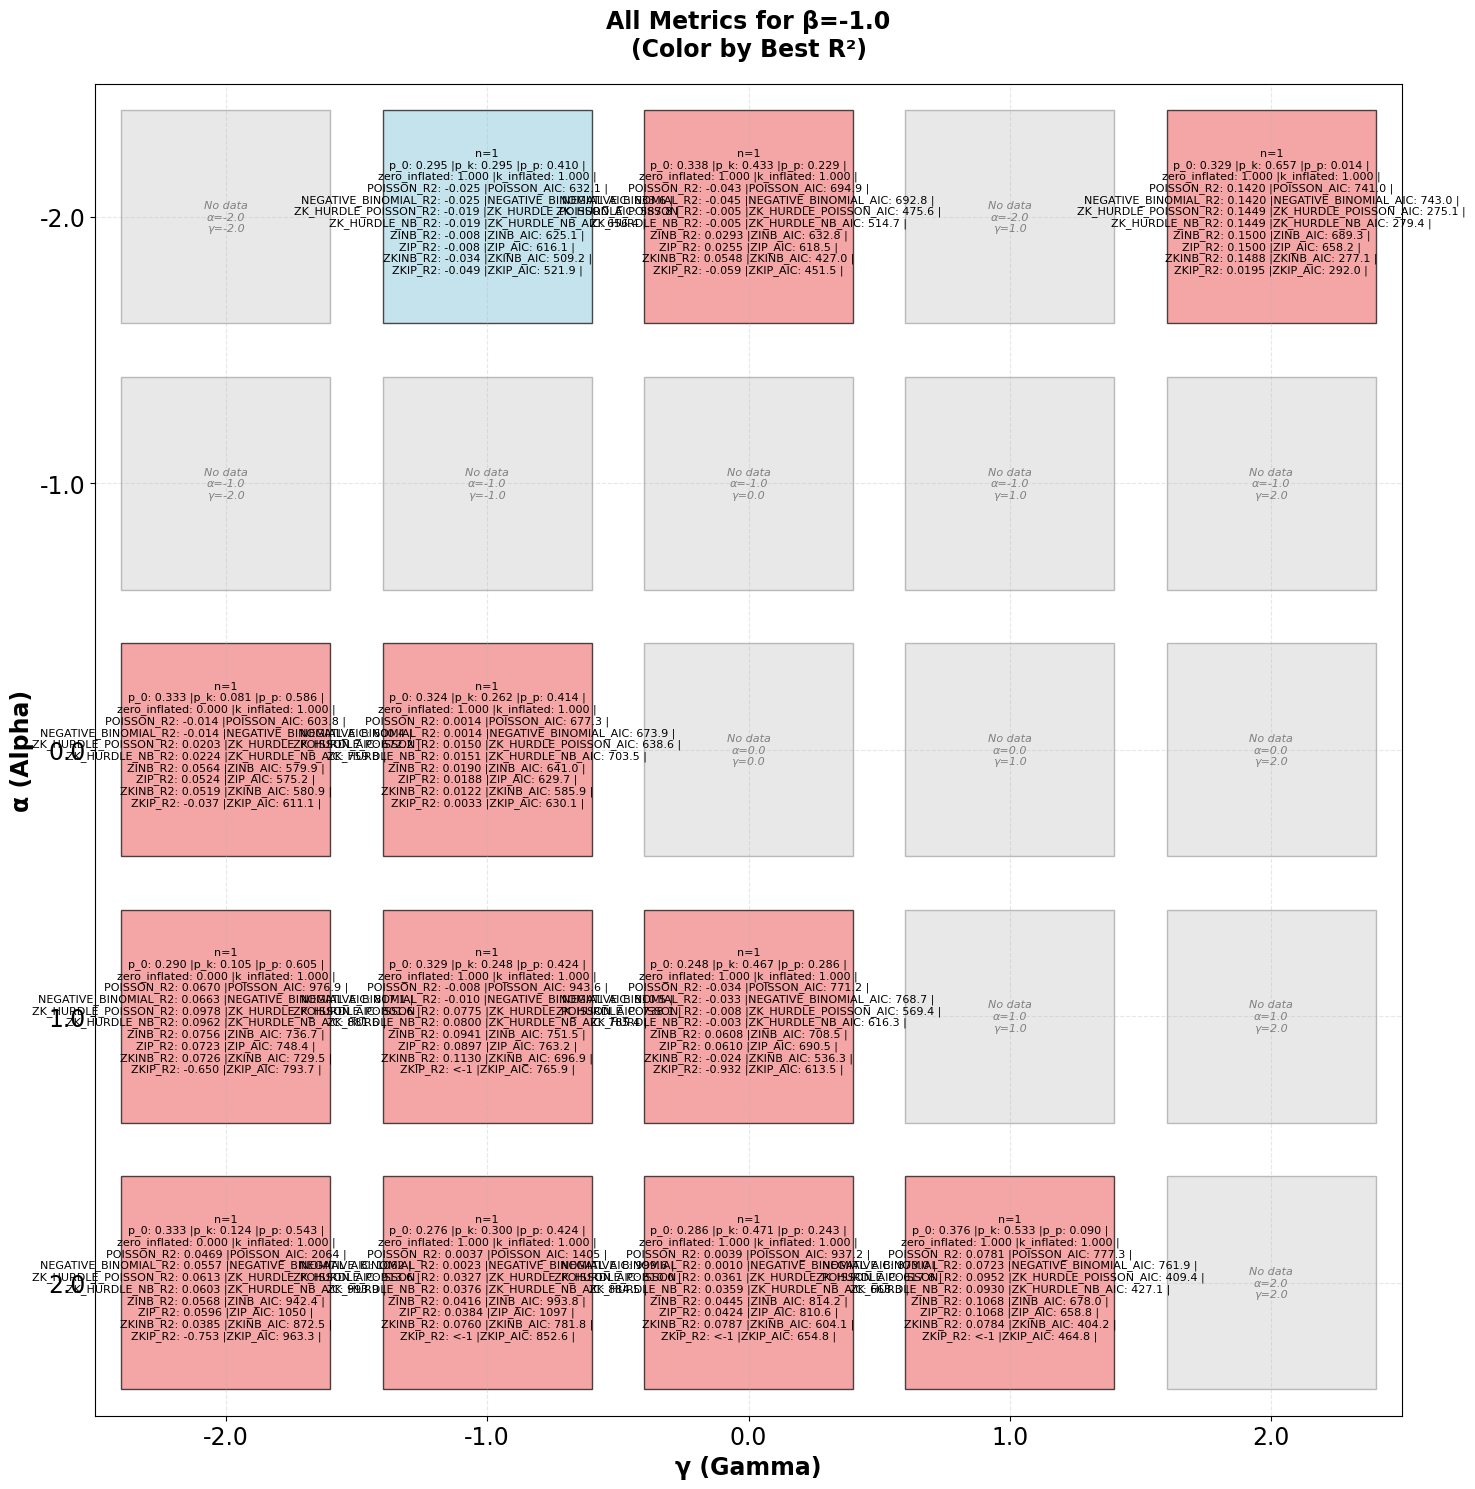

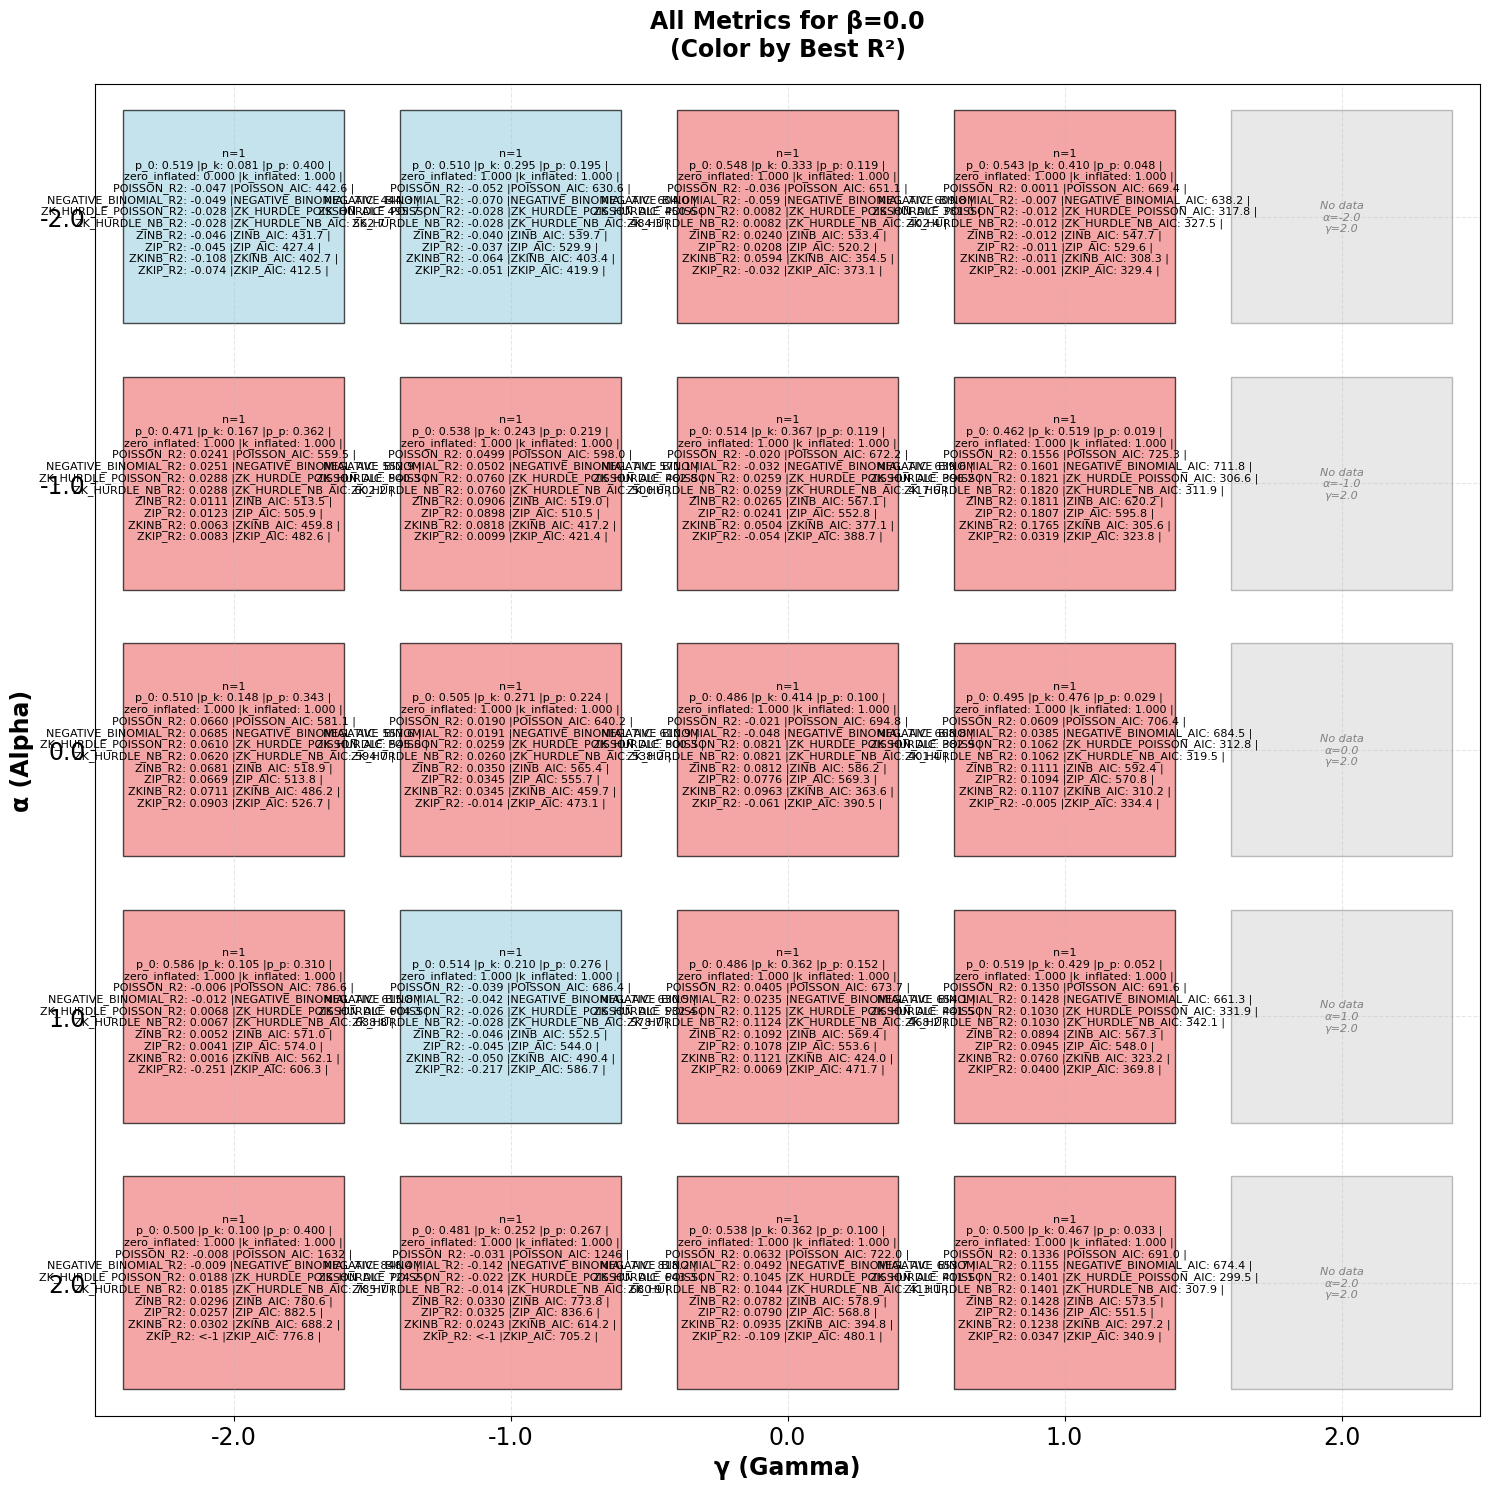

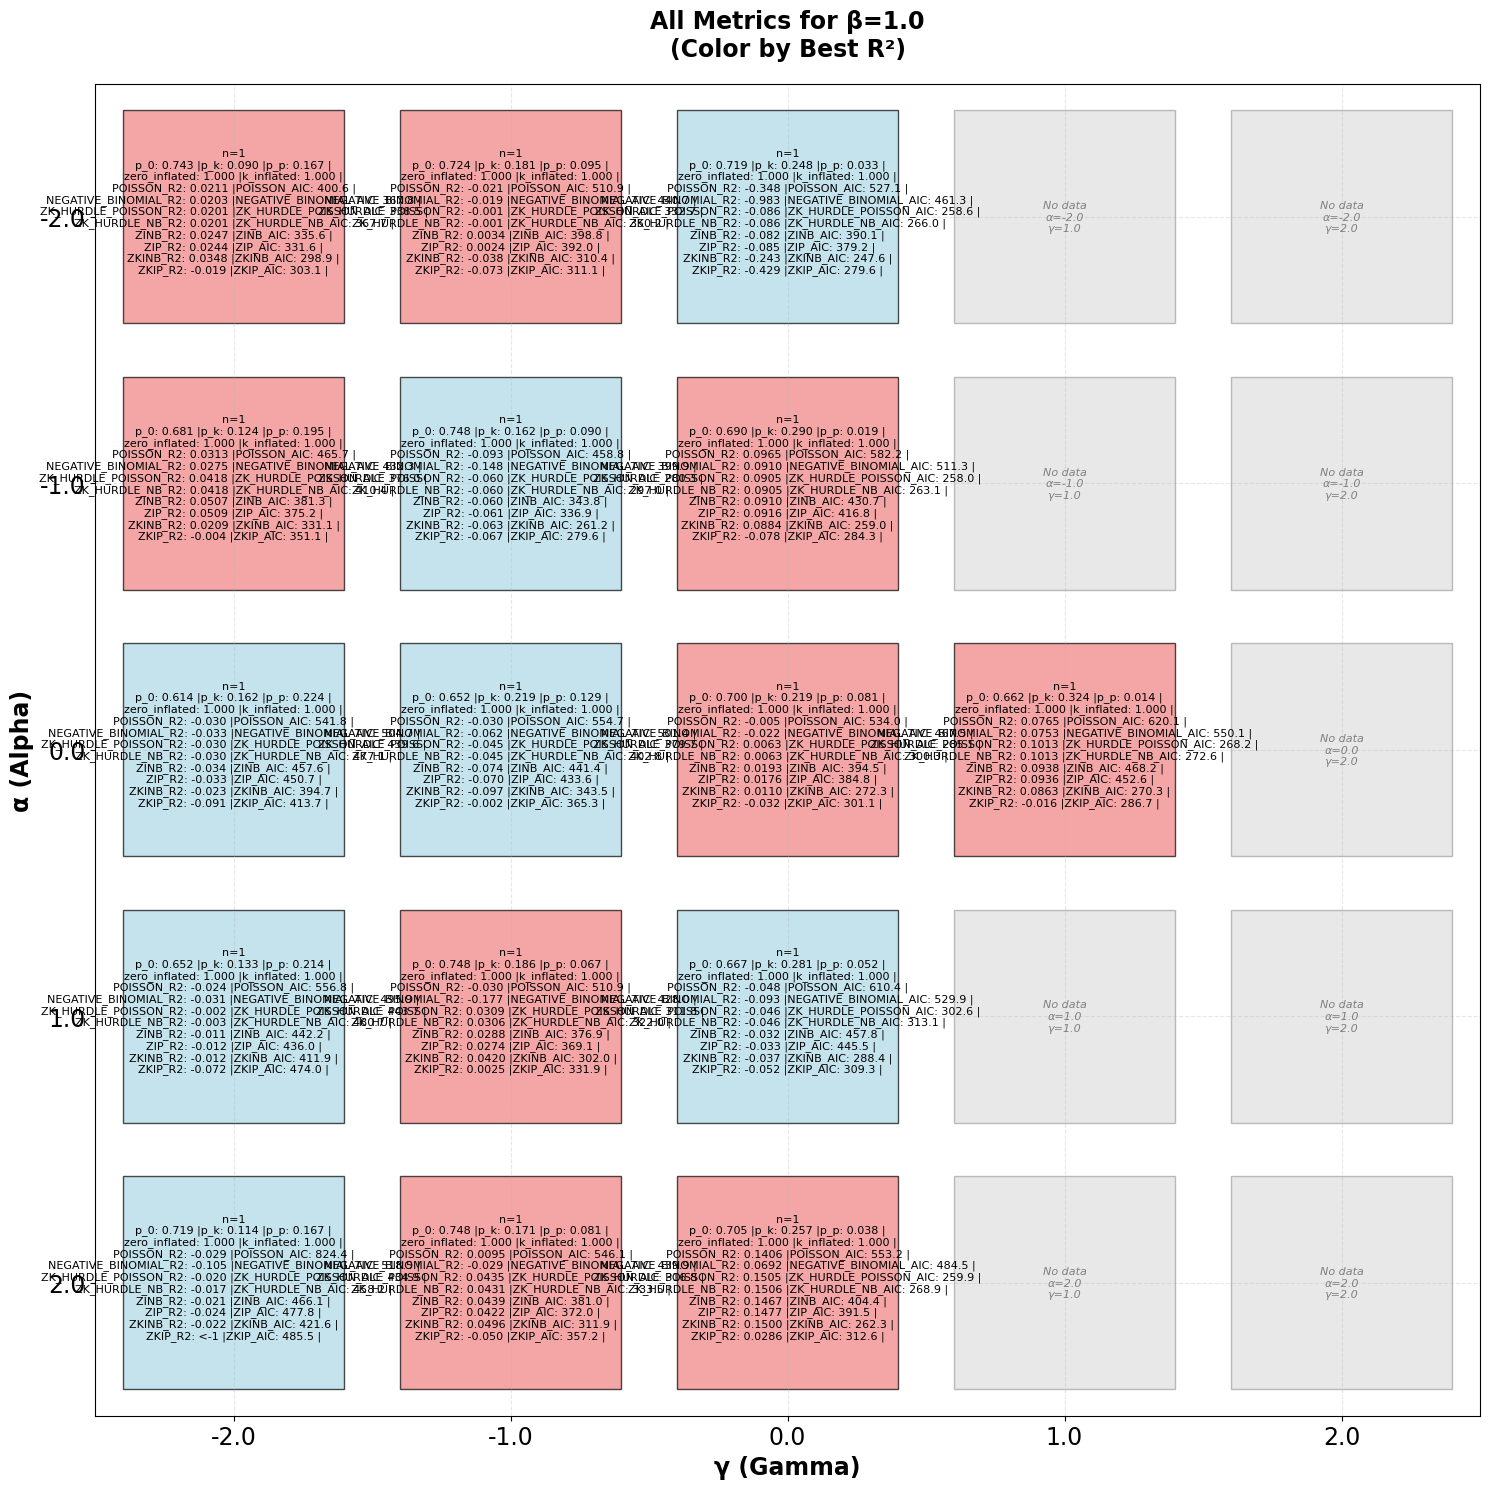

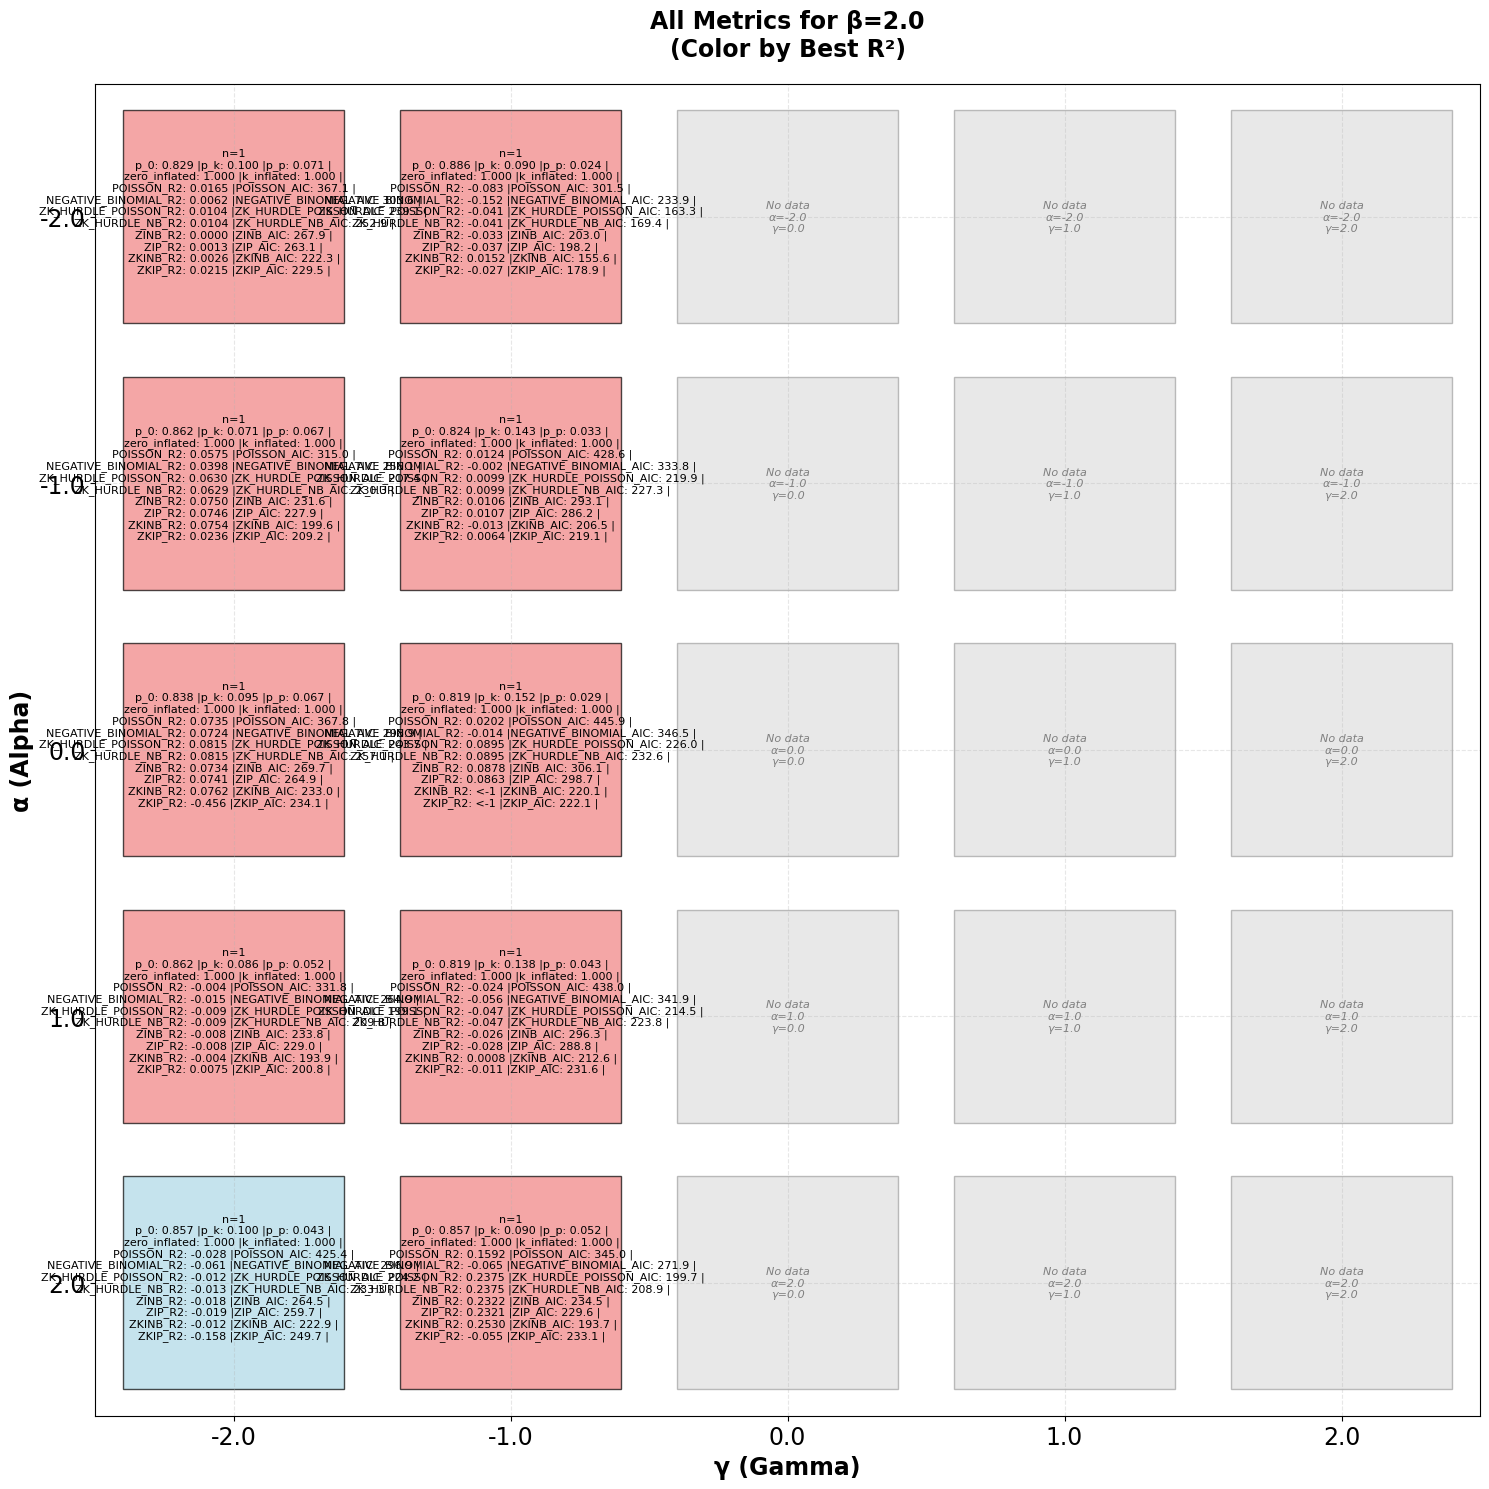

In [139]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dfp = results_H

# Generate alpha, beta, and gamma values
beta_values = np.linspace(-2, 2, 5)
alphas = np.linspace(-2, 2, 5)
gammas = np.linspace(-2, 2, 5)

sizz = 15  # Increased size for better readability

# Define all columns you want to include
all_columns = [
    'p_0', 'p_k', 'p_p', 
    'zero_inflated', 'k_inflated',
    'POISSON_R2', 'POISSON_AIC',
    'NEGATIVE_BINOMIAL_R2', 'NEGATIVE_BINOMIAL_AIC',
    'ZK_HURDLE_POISSON_R2', 'ZK_HURDLE_POISSON_AIC',
    'ZK_HURDLE_NB_R2', 'ZK_HURDLE_NB_AIC',
    'ZINB_R2', 'ZINB_AIC',
    'ZIP_R2', 'ZIP_AIC',
    'ZKINB_R2', 'ZKINB_AIC',
    'ZKIP_R2', 'ZKIP_AIC'
]

col_p=['p_0', 'p_k', 'p_p']
col_inf=['zero_inflated', 'k_inflated']
col_pois=['POISSON_R2', 'POISSON_AIC']
col_nb=['NEGATIVE_BINOMIAL_R2', 'NEGATIVE_BINOMIAL_AIC']
col_PH=['ZK_HURDLE_POISSON_R2', 'ZK_HURDLE_POISSON_AIC']
col_nbH=['ZK_HURDLE_NB_R2', 'ZK_HURDLE_NB_AIC']
col_ZINB=['ZINB_R2', 'ZINB_AIC']
col_ZIP=['ZIP_R2', 'ZIP_AIC']
col_ZKINB=['ZKINB_R2', 'ZKINB_AIC']
col_ZKIP=['ZKIP_R2', 'ZKIP_AIC']

# Helper function to format values
def format_value(val, col_name):
    if pd.isna(val):
        return "NaN"
    
    # Clip very negative R2 values
    if 'R2' in col_name and val < -1:
        return "<-1"
    
    # Format AIC values (often large)
    if 'AIC' in col_name:
        if abs(val) > 10000:
            return f"{val:.1e}"
        elif abs(val) > 1000:
            return f"{val:.0f}"
        else:
            return f"{val:.1f}"
    
    # Format probabilities
    if col_name in ['p_0', 'p_k', 'p_p', 'zero_inflated', 'k_inflated']:
        return f"{val:.3f}"
    
    # Format R2 values
    if 'R2' in col_name:
        if val < 0:
            return f"{val:.3f}"
        else:
            return f"{val:.4f}"
    
    # Default formatting
    return f"{val:.3f}"

# Create a figure for each beta value
for beta_idx, beta_val in enumerate(beta_values):
    fig, ax = plt.subplots(figsize=(sizz, sizz))
    
    # Create a grid
    for i, alpha in enumerate(alphas):
        for j, gamma in enumerate(gammas):
            x_pos = j  # gamma on x-axis
            y_pos = len(alphas) - 1 - i  # alpha on y-axis (inverted for correct orientation)
            
            mask = (dfp['alpha'] == alpha) & (dfp['gamma'] == gamma) & (dfp['beta'] == beta_val)
            filtered_data = dfp.loc[mask]
            
            if not filtered_data.empty:
                count = len(filtered_data)
                
                # Create annotation box
                text = f"n={count}\n"
                col_p=['p_0', 'p_k', 'p_p']

                # Add all column means with formatting

                lol=[col_p, col_inf, col_pois, col_nb, col_PH, col_nbH, col_ZINB, col_ZIP, col_ZKINB, col_ZKIP]
                for l in lol: 
                    for col in all_columns:
                        if col in l:
                            mean_val = np.mean(filtered_data[col])
                            text += f"{col}: {format_value(mean_val, col)} |"
                    text+='\n'
                
                # Truncate text if too long (optional)
                if len(text) > 500:
                    text = text[:500] + "..."
                
                # Determine color based on best R2
                r2_cols = [col for col in all_columns if 'R2' in col]
                r2_vals = []
                for col in r2_cols:
                    if col in dfp.columns:
                        val = np.mean(filtered_data[col])
                        if not pd.isna(val):
                            r2_vals.append(val)
                
                if r2_vals:
                    best_r2 = max(r2_vals)
                    # Color gradient based on best R2
                    if best_r2 > 0.8:
                        color = 'lightgreen'
                    elif best_r2 > 0.5:
                        color = 'lightyellow'
                    elif best_r2 > 0:
                        color = 'lightcoral'
                    elif best_r2 > -1:
                        color = 'lightblue'
                    else:
                        color = 'lavender'
                else:
                    color = 'lightblue'
                
                # Add background rectangle
                rect = plt.Rectangle((x_pos - 0.4, y_pos - 0.4), 0.8, 0.8,
                                    facecolor=color, edgecolor='black',
                                    alpha=0.7, linewidth=1)
                ax.add_patch(rect)
                
                # Add text with adjusted font size
                font_size = max(sizz - 7, 4)  # Ensure minimum font size
                ax.text(x_pos, y_pos, text,
                       ha='center', va='center',
                       fontsize=font_size, fontweight='normal',
                       linespacing=1.1)
            else:
                # No data
                rect = plt.Rectangle((x_pos - 0.4, y_pos - 0.4), 0.8, 0.8,
                                    facecolor='lightgray', edgecolor='gray',
                                    alpha=0.5, linewidth=1)
                ax.add_patch(rect)
                ax.text(x_pos, y_pos, f"No data\nα={alpha:.1f}\nγ={gamma:.1f}",
                       ha='center', va='center',
                       fontsize=sizz-7, color='gray', style='italic')
    
    # Set up the plot
    ax.set_xlim(-0.5, len(gammas) - 0.5)
    ax.set_ylim(-0.5, len(alphas) - 0.5)
    ax.set_xticks(np.arange(len(gammas)))
    ax.set_yticks(np.arange(len(alphas)))
    ax.set_xticklabels([f'{g:.1f}' for g in gammas], fontsize=sizz+2)
    ax.set_yticklabels([f'{a:.1f}' for a in alphas[::-1]], fontsize=sizz+2)
    ax.set_xlabel('γ (Gamma)', fontsize=sizz+2, fontweight='bold')
    ax.set_ylabel('α (Alpha)', fontsize=sizz+2, fontweight='bold')
    ax.set_title(f'All Metrics for β={beta_val:.1f}\n(Color by Best R²)',
                fontsize=sizz+2, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.show()

In [134]:
import plotly.graph_objects as go
import plotly.subplots as sp
import numpy as np
import pandas as pd

beta_values = np.linspace(-2, 2, 5)
alphas = np.linspace(-2, 2, 5)
gammas = np.linspace(-2, 2, 5)

for beta_val in beta_values:
    # Create hover text for all cells
    hover_texts = []
    values = []
    
    for i, alpha in enumerate(alphas):
        row_texts = []
        row_values = []
        for j, gamma in enumerate(gammas):
            mask = (results['alpha'] == alpha) & (results['gamma'] == gamma) & (results['beta'] == beta_val)
            filtered_data = results.loc[mask]
            
            if not filtered_data.empty:
                if len(filtered_data) == 1:
                    row = filtered_data.iloc[0]
                else:
                    row = filtered_data.mean(numeric_only=True)
                
                # Create hover text
                hover = f"<b>α={alpha:.2f}, γ={gamma:.2f}, β={beta_val:.2f}</b><br>"
                hover += f"Samples: {len(filtered_data)}<br><br>"
                
                hover += "<b>Basic Metrics:</b><br>"
                for metric in ['p_0', 'p_k', 'p_p', 'zero_inflated', 'k_inflated']:
                    if metric in row:
                        val = row[metric]
                        hover += f"{metric}: {val:.4f}<br>"
                
                hover += "<br><b>Best R² Values:</b><br>"
                r2_cols = [col for col in results.columns if 'R2' in col]
                for r2_col in r2_cols[:5]:  # Show top 5
                    if r2_col in row:
                        val = row[r2_col]
                        if val < -1:
                            hover += f"{r2_col}: &lt;-1<br>"
                        else:
                            hover += f"{r2_col}: {val:.4f}<br>"
                
                row_texts.append(hover)
                
                # Use average R2 as value for coloring
                r2_vals = [row[col] for col in r2_cols if col in row and pd.notna(row[col])]
                avg_r2 = np.mean(r2_vals) if r2_vals else 0
                row_values.append(avg_r2)
                
            else:
                row_texts.append(f"No data for α={alpha:.2f}, γ={gamma:.2f}")
                row_values.append(np.nan)
        
        hover_texts.append(row_texts)
        values.append(row_values)
    
    # Create heatmap
    fig = go.Figure(data=go.Heatmap(
        z=values,
        x=gammas,
        y=alphas,
        text=hover_texts,
        hoverinfo='text',
        colorscale='RdYlGn',
        zmin=-1,
        zmax=1,
        colorbar=dict(title="Avg R²")
    ))
    
    fig.update_layout(
        title=f"Model Performance Heatmap - β={beta_val:.2f}",
        xaxis_title="γ (Gamma)",
        yaxis_title="α (Alpha)",
        width=1000,
        height=800
    )
    
    fig.show()

In [118]:
(results_H.loc[:, 'ZK_HURDLE_POISSON_R2']<0).mean()

np.float64(0.2753623188405797)

In [12]:
AIC=['POISSON_AIC', 'NEGATIVE_BINOMIAL_AIC', 'ZK_HURDLE_POISSON_AIC', 'ZK_HURDLE_NB_AIC', 'ZINB_AIC', 'ZIP_AIC', 'ZKINB_AIC', 'ZKIP_AIC']
r2=['POISSON_R2', 'NEGATIVE_BINOMIAL_R2', 'ZK_HURDLE_POISSON_R2', 'ZK_HURDLE_NB_R2', 'ZINB_R2', 'ZIP_R2', 'ZKINB_R2', 'ZKIP_R2']

In [80]:
for i in r2:
    print(f'model:{i} r^2={np.max(results_H.loc[:, i]):.3f}')

model:POISSON_R2 r^2=0.209
model:NEGATIVE_BINOMIAL_R2 r^2=0.212
model:ZK_HURDLE_POISSON_R2 r^2=0.210
model:ZK_HURDLE_NB_R2 r^2=0.204
model:ZINB_R2 r^2=0.200
model:ZIP_R2 r^2=0.201
model:ZKINB_R2 r^2=0.200
model:ZKIP_R2 r^2=0.108


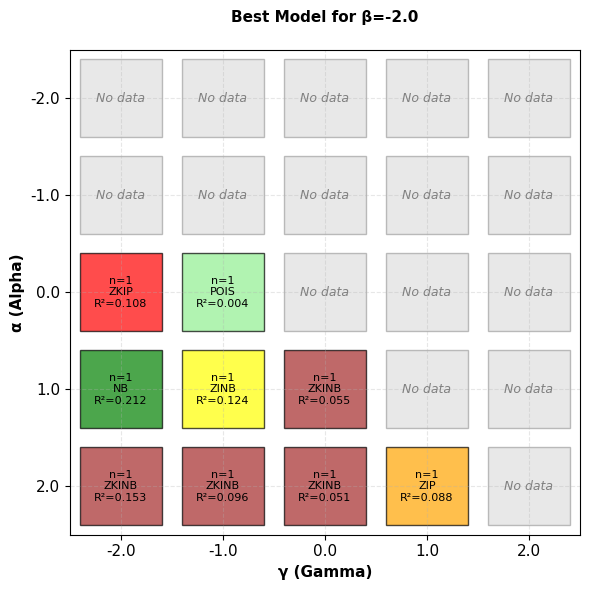

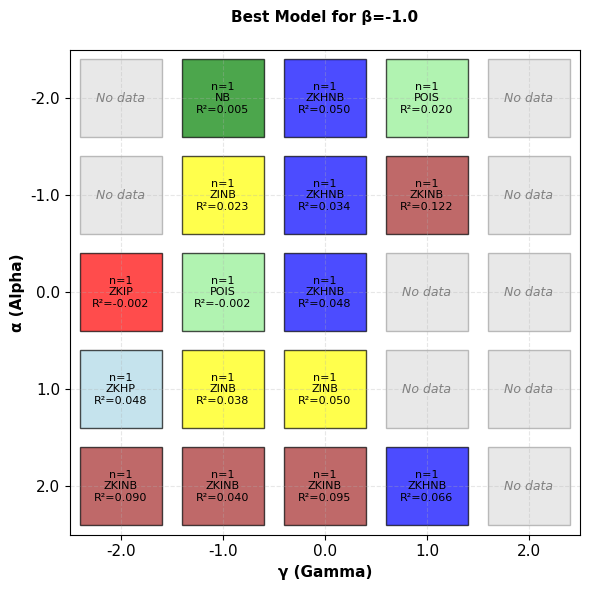

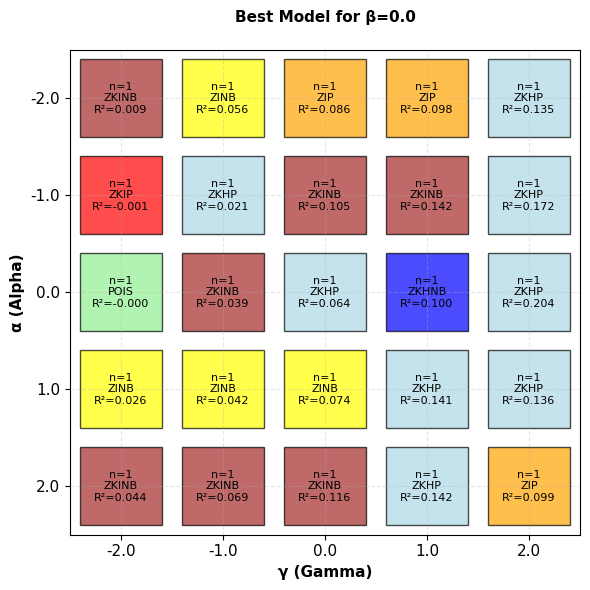

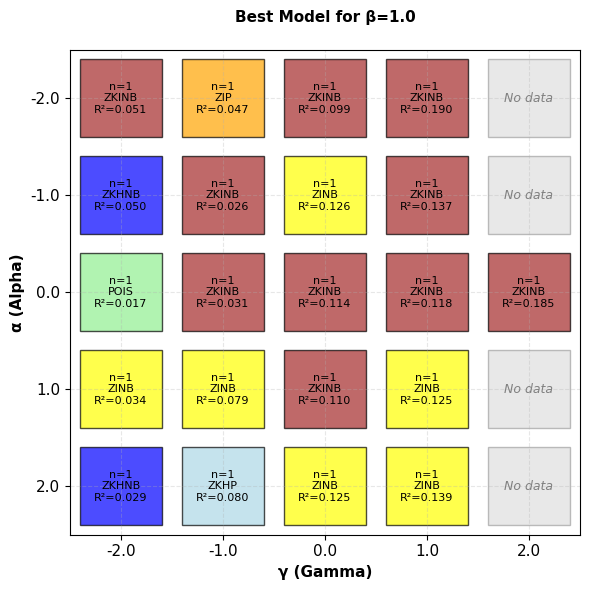

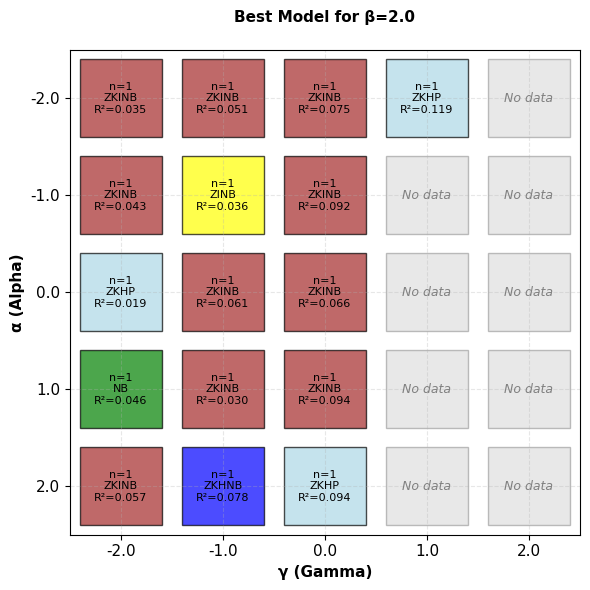

In [81]:
# R2 winners
dfp=results_H
# List of R² columns for different models
r2_columns = ['POISSON_R2', 'NEGATIVE_BINOMIAL_R2', 'ZK_HURDLE_POISSON_R2', 
              'ZK_HURDLE_NB_R2', 'ZINB_R2', 'ZIP_R2', 'ZKINB_R2', 'ZKIP_R2']

# Shorter model names for display (optional)
model_names = ['POIS', 'NB', 'ZKHP', 'ZKHNB', 'ZINB', 'ZIP', 'ZKINB', 'ZKIP']

color=['lightgreen', 'green', 'lightblue', 'blue', 'yellow', 'orange', 'brown', 'red']

# Generate alpha, beta, and gamma values
beta_values = np.linspace(-2, 2, 5)
alphas = np.linspace(-2, 2, 5)
gammas = np.linspace(-2, 2, 5)

sizz = 6
tolerance = 1e-9
m=[]
for beta_idx, beta_val in enumerate(beta_values):
    fig, ax = plt.subplots(figsize=(sizz, sizz))
    
    for i, alpha in enumerate(alphas):
        for j, gamma in enumerate(gammas):
            x_pos = j
            y_pos = len(alphas) - 1 - i
            
            # Use tolerance for float comparison
            mask = (
                (np.abs(dfp['alpha'] - alpha) < tolerance) & 
                (np.abs(dfp['gamma'] - gamma) < tolerance) & 
                (np.abs(dfp['beta'] - beta_val) < tolerance)
            )
            filtered_data = dfp.loc[mask]
            
            if not filtered_data.empty:
                count = len(filtered_data)
                
                # Calculate mean R² for EACH model across the filtered rows
                r2_means = []
                for r2_col in r2_columns:
                    if r2_col in filtered_data.columns:
                        r2_means.append(filtered_data[r2_col].mean())
                    else:
                        r2_means.append(-np.inf)  # Use -inf if column doesn't exist
                
                # Find the model with highest average R²
                best_idx = np.argmax(r2_means)
                best_r2 = r2_means[best_idx]
                best_model = model_names[best_idx] if best_idx < len(model_names) else r2_columns[best_idx]
                m.append({'best_model': best_model})
                # Create text
                text = f"n={count}\n"
                text += f"{best_model}\n"
                text += f"R²={best_r2:.3f}"
                
                # Choose color based on model type (optional)
                
                rect = plt.Rectangle((x_pos - 0.4, y_pos - 0.4), 0.8, 0.8,
                                    facecolor=color[best_idx], edgecolor='black',
                                    alpha=0.7, linewidth=1)
                ax.add_patch(rect)
                
                ax.text(x_pos, y_pos, text,
                       ha='center', va='center',
                       fontsize=8,  # Reduced font size
                       linespacing=1.2)
            else:
                rect = plt.Rectangle((x_pos - 0.4, y_pos - 0.4), 0.8, 0.8,
                                    facecolor='lightgray', edgecolor='gray',
                                    alpha=0.5, linewidth=1)
                ax.add_patch(rect)
                ax.text(x_pos, y_pos, "No data",
                       ha='center', va='center',
                       fontsize=9, color='gray', style='italic')
    
    # Set up the plot
    ax.set_xlim(-0.5, len(gammas) - 0.5)
    ax.set_ylim(-0.5, len(alphas) - 0.5)
    ax.set_xticks(np.arange(len(gammas)))
    ax.set_yticks(np.arange(len(alphas)))
    ax.set_xticklabels([f'{g:.1f}' for g in gammas], fontsize=sizz+5)
    ax.set_yticklabels([f'{a:.1f}' for a in alphas[::-1]], fontsize=sizz+5)
    ax.set_xlabel('γ (Gamma)', fontsize=sizz+5, fontweight='bold')
    ax.set_ylabel('α (Alpha)', fontsize=sizz+5, fontweight='bold')
    ax.set_title(f'Best Model for β={beta_val:.1f}',
                fontsize=sizz+5, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.show()

In [82]:
m=pd.DataFrame(m)
m.value_counts()

best_model
ZKINB         35
ZINB          15
ZKHP          13
ZKHNB          8
POIS           5
ZIP            5
NB             3
ZKIP           3
Name: count, dtype: int64

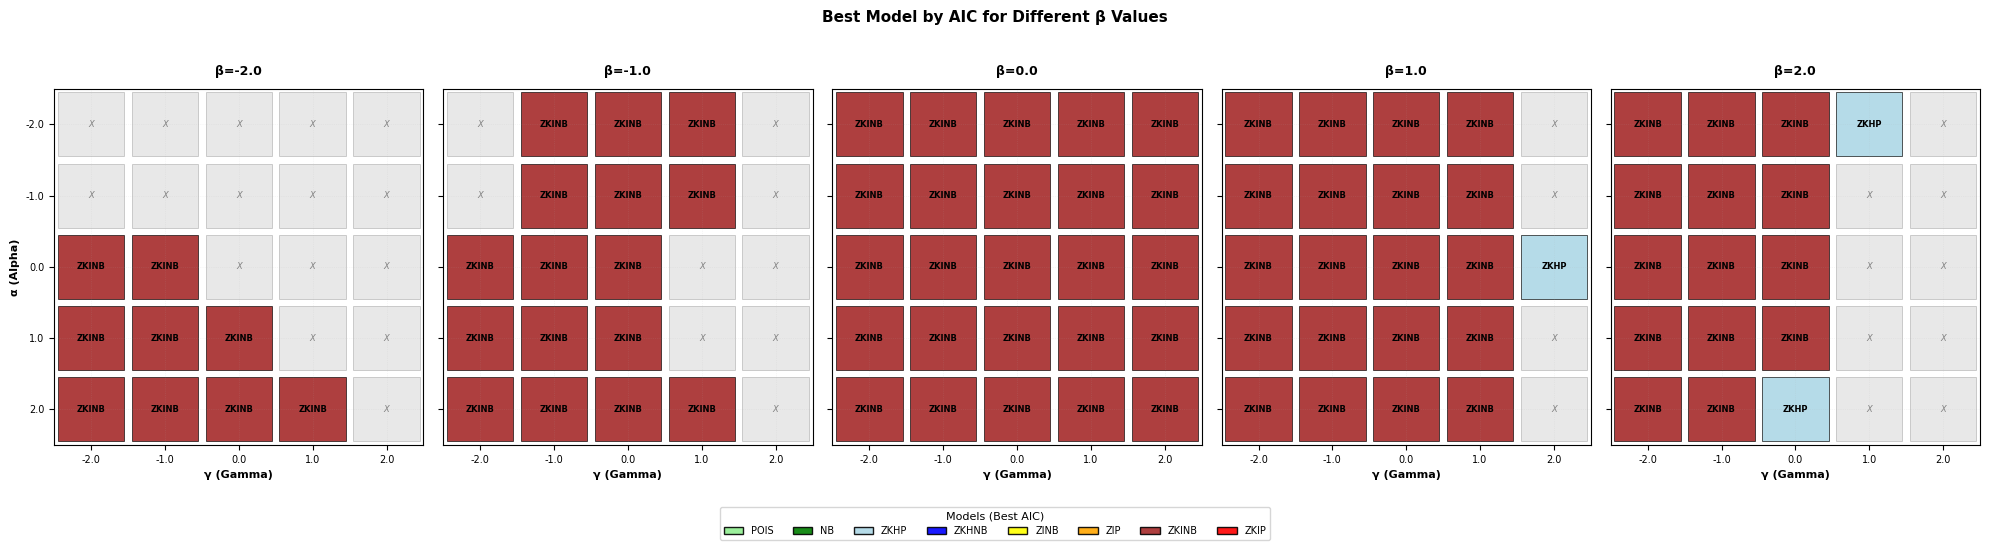


BEST MODEL SUMMARY STATISTICS

Model frequency (number of cells where model had lowest AIC):
  ZKINB: 84 cells (96.6%)
  ZKHP: 3 cells (3.4%)

Best models by β value:
  β=-2.0: ZKINB (9 cells)
  β=-1.0: ZKINB (16 cells)
  β=0.0: ZKINB (25 cells)
  β=1.0: ZKINB (20 cells)
  β=2.0: ZKINB (14 cells)

Overall statistics:
  Total cells with valid models: 87
  Minimum AIC: 1029.88
  Maximum AIC: 6958.49
  Mean AIC: 2620.72


In [4]:
# AIC winners - Compact version with single row layout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dfp = results_H

# List of AIC columns for different models
AIC_columns = ['POISSON_AIC', 'NEGATIVE_BINOMIAL_AIC', 'ZK_HURDLE_POISSON_AIC', 
               'ZK_HURDLE_NB_AIC', 'ZINB_AIC', 'ZIP_AIC', 'ZKINB_AIC', 'ZKIP_AIC']

# Shorter model names for display
model_names = ['POIS', 'NB', 'ZKHP', 'ZKHNB', 'ZINB', 'ZIP', 'ZKINB', 'ZKIP']

# Colors for each model
colors = ['lightgreen', 'green', 'lightblue', 'blue', 'yellow', 'orange', 'brown', 'red']

# Generate alpha, beta, and gamma values
beta_values = np.linspace(-2, 2, 5)
alphas = np.linspace(-2, 2, 5)
gammas = np.linspace(-2, 2, 5)

# Set compact figure size
sizz = 4  # Reduced from 6 to make plots more compact
tolerance = 1e-6
best_models_summary = []

# Create a single figure with subplots in one row
fig, axes = plt.subplots(1, len(beta_values), figsize=(sizz * len(beta_values), sizz + 1))

# If only one beta value, axes won't be an array
if len(beta_values) == 1:
    axes = [axes]

for beta_idx, (beta_val, ax) in enumerate(zip(beta_values, axes)):
    for i, alpha in enumerate(alphas):
        for j, gamma in enumerate(gammas):
            x_pos = j
            y_pos = len(alphas) - 1 - i
            
            # Use tolerance for float comparison
            mask = (
                (np.abs(dfp['alpha'] - alpha) < tolerance) & 
                (np.abs(dfp['gamma'] - gamma) < tolerance) & 
                (np.abs(dfp['beta'] - beta_val) < tolerance)
            )
            filtered_data = dfp.loc[mask]
            p_0_mean = np.mean(filtered_data['p_0']) if not filtered_data.empty else np.nan
            p_k_mean = np.mean(filtered_data['p_k']) if not filtered_data.empty else np.nan
            p_p_mean = np.mean(filtered_data['p_p']) if not filtered_data.empty else np.nan
            
            if not filtered_data.empty:
                count = len(filtered_data)
                
                # Calculate mean AIC for EACH model across the filtered rows
                aic_means = []
                valid_models = []
                
                for idx, aic_col in enumerate(AIC_columns):
                    if aic_col in filtered_data.columns:
                        mean_aic = filtered_data[aic_col].mean()
                        if not np.isnan(mean_aic):
                            aic_means.append(mean_aic)
                            valid_models.append(idx)
                        else:
                            aic_means.append(np.inf)
                            valid_models.append(idx)
                    else:
                        aic_means.append(np.inf)
                        valid_models.append(idx)
                
                if valid_models:
                    best_idx = np.argmin(aic_means)
                    best_aic = aic_means[best_idx]
                    
                    if np.isfinite(best_aic):
                        best_model_name = model_names[best_idx] if best_idx < len(model_names) else AIC_columns[best_idx]
                        
                        # Store for summary
                        best_models_summary.append({
                            'beta': beta_val,
                            'alpha': alpha,
                            'gamma': gamma,
                            'best_model': best_model_name,
                            'best_aic': best_aic,
                            'count': count, 
                            'p_0': p_0_mean,
                            'p_k': p_k_mean,
                            'p_p': p_p_mean
                        })
                        
                        # Create compact text - ONLY show model abbreviation
                        text = f"{best_model_name}"
                        
                        # Choose color based on model type
                        color_idx = best_idx % len(colors)
                        rect_color = colors[color_idx]
                        
                        # Smaller rectangle for compact display
                        rect = plt.Rectangle((x_pos - 0.45, y_pos - 0.45), 0.9, 0.9,
                                            facecolor=rect_color, edgecolor='black',
                                            alpha=0.9, linewidth=0.5)  # Reduced alpha for better visibility
                        ax.add_patch(rect)
                        
                        # Smaller font, just model name
                        ax.text(x_pos, y_pos, text,
                               ha='center', va='center',
                               fontsize=6,  # Smaller font
                               fontweight='bold',  # Make text bolder for better visibility
                               color='black')  # Black text for contrast
                    else:
                        # No valid AIC values - gray cell
                        rect = plt.Rectangle((x_pos - 0.45, y_pos - 0.45), 0.9, 0.9,
                                            facecolor='lightgray', edgecolor='gray',
                                            alpha=0.5, linewidth=0.5)
                        ax.add_patch(rect)
                        ax.text(x_pos, y_pos, "X",
                               ha='center', va='center',
                               fontsize=6, color='gray')
                else:
                    # No valid models - gray cell
                    rect = plt.Rectangle((x_pos - 0.45, y_pos - 0.45), 0.9, 0.9,
                                        facecolor='lightgray', edgecolor='gray',
                                        alpha=0.5, linewidth=0.5)
                    ax.add_patch(rect)
                    ax.text(x_pos, y_pos, "X",
                           ha='center', va='center',
                           fontsize=6, color='gray')
                    
            else:
                # No data - gray cell
                rect = plt.Rectangle((x_pos - 0.45, y_pos - 0.45), 0.9, 0.9,
                                    facecolor='lightgray', edgecolor='gray',
                                    alpha=0.5, linewidth=0.5)
                ax.add_patch(rect)
                ax.text(x_pos, y_pos, "X",
                       ha='center', va='center',
                       fontsize=6, color='gray', style='italic')
    
    # Set up the plot
    ax.set_xlim(-0.5, len(gammas) - 0.5)
    ax.set_ylim(-0.5, len(alphas) - 0.5)
    ax.set_xticks(np.arange(len(gammas)))
    ax.set_yticks(np.arange(len(alphas)))
    
    # Only label outer axes to reduce clutter
    if beta_idx == 0:  # First plot
        ax.set_ylabel('α (Alpha)', fontsize=8, fontweight='bold')
        ax.set_yticklabels([f'{a:.1f}' for a in alphas[::-1]], fontsize=7)
    else:
        ax.set_yticklabels([])
    
    # Always show x-axis labels but smaller
    ax.set_xlabel('γ (Gamma)', fontsize=8, fontweight='bold')
    ax.set_xticklabels([f'{g:.1f}' for g in gammas], fontsize=7)
    
    ax.set_title(f'β={beta_val:.1f}', fontsize=9, fontweight='bold', pad=10)
    ax.grid(True, alpha=0.2, linestyle=':', linewidth=0.5)  # Lighter grid

# Add a shared legend at the bottom
from matplotlib.patches import Patch
legend_elements = []
for i, model in enumerate(model_names):
    if i < len(colors):
        legend_elements.append(Patch(facecolor=colors[i], edgecolor='black', 
                                    alpha=0.9, label=model))

# Place legend at the bottom, centered
fig.legend(handles=legend_elements, loc='lower center', 
           ncol=len(model_names), fontsize=7, 
           title='Models (Best AIC)', title_fontsize=8,
           bbox_to_anchor=(0.5, -0.05))

plt.suptitle('Best Model by AIC for Different β Values', fontsize=11, fontweight='bold', y=1.02)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for bottom legend
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("BEST MODEL SUMMARY STATISTICS")
print("="*60)

if best_models_summary:
    summary_df = pd.DataFrame(best_models_summary)
    
    # Count occurrences of each model
    model_counts = summary_df['best_model'].value_counts()
    print("\nModel frequency (number of cells where model had lowest AIC):")
    for model, count in model_counts.items():
        percentage = (count / len(summary_df)) * 100
        print(f"  {model}: {count} cells ({percentage:.1f}%)")
    
    # Best model by beta
    print("\nBest models by β value:")
    for beta_val in beta_values:
        beta_subset = summary_df[summary_df['beta'] == beta_val]
        if not beta_subset.empty:
            beta_counts = beta_subset['best_model'].value_counts()
            best_in_beta = beta_counts.idxmax() if not beta_counts.empty else "None"
            print(f"  β={beta_val:.1f}: {best_in_beta} ({beta_counts.max()} cells)")
    
    # Best AIC statistics
    print(f"\nOverall statistics:")
    print(f"  Total cells with valid models: {len(summary_df)}")
    print(f"  Minimum AIC: {summary_df['best_aic'].min():.2f}")
    print(f"  Maximum AIC: {summary_df['best_aic'].max():.2f}")
    print(f"  Mean AIC: {summary_df['best_aic'].mean():.2f}")
else:
    print("No valid models found in any cell!")

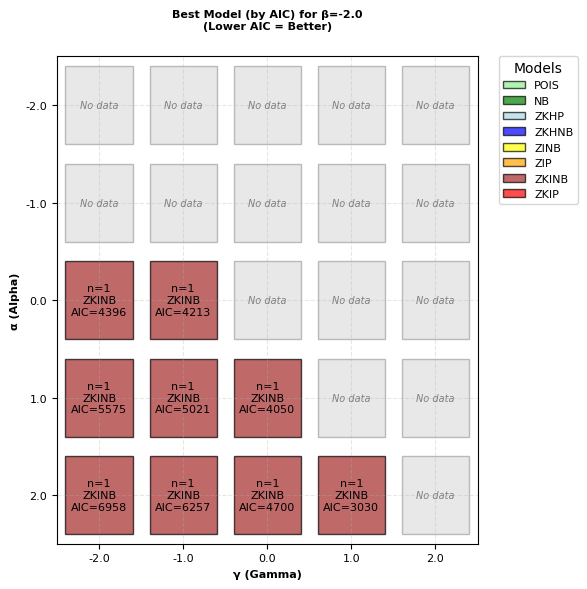

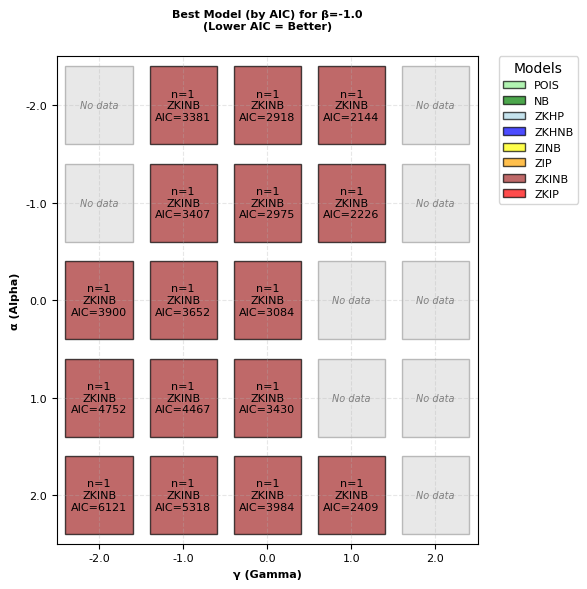

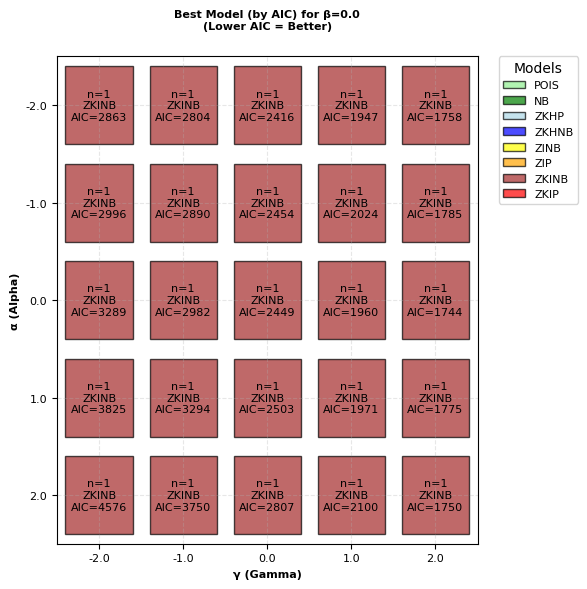

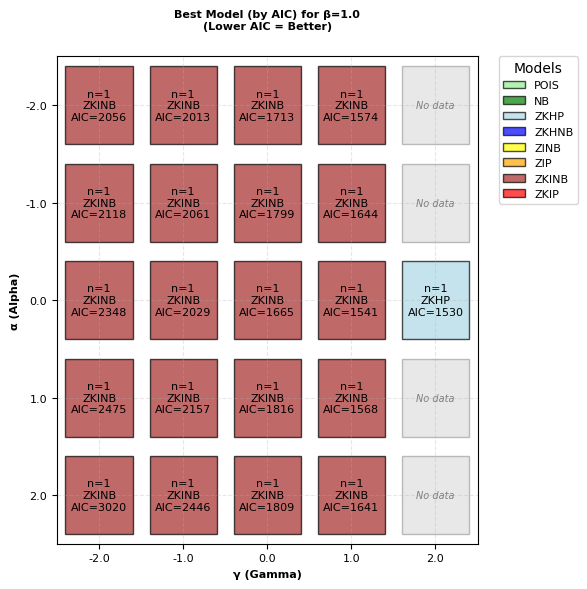

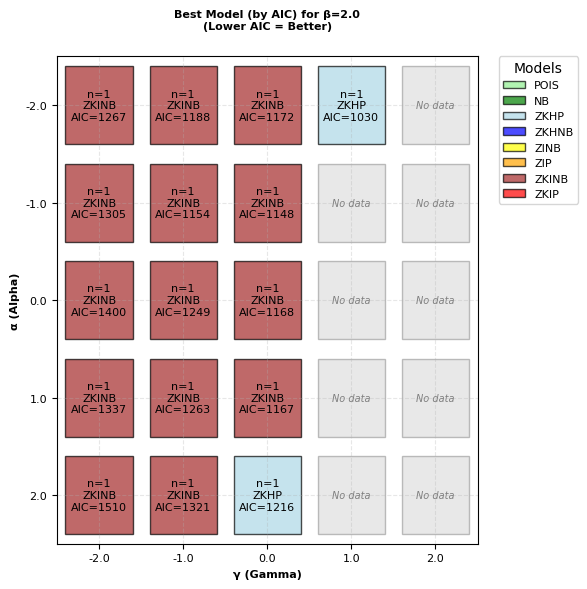


BEST MODEL SUMMARY STATISTICS

Model frequency (number of cells where model had lowest AIC):
  ZKINB: 84 cells (96.6%)
  ZKHP: 3 cells (3.4%)

Best models by β value:
  β=-2.0: ZKINB (9 cells)
  β=-1.0: ZKINB (16 cells)
  β=0.0: ZKINB (25 cells)
  β=1.0: ZKINB (20 cells)
  β=2.0: ZKINB (14 cells)

Overall statistics:
  Total cells with valid models: 87
  Minimum AIC: 1029.88
  Maximum AIC: 6958.49
  Mean AIC: 2620.72


In [ ]:
# AIC winners
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dfp = results_H

# List of AIC columns for different models
AIC_columns = ['POISSON_AIC', 'NEGATIVE_BINOMIAL_AIC', 'ZK_HURDLE_POISSON_AIC', 
               'ZK_HURDLE_NB_AIC', 'ZINB_AIC', 'ZIP_AIC', 'ZKINB_AIC', 'ZKIP_AIC'] #<----change to MSE(ex:- POISSON_AIC->POISSON_MSE)

# Shorter model names for display
model_names = ['POIS', 'NB', 'ZKHP', 'ZKHNB', 'ZINB', 'ZIP', 'ZKINB', 'ZKIP']

# Colors for each model
colors = ['lightgreen', 'green', 'lightblue', 'blue', 'yellow', 'orange', 'brown', 'red']

# Generate alpha, beta, and gamma values
beta_values = np.linspace(-2, 2, 5)
alphas = np.linspace(-2, 2, 5)
gammas = np.linspace(-2, 2, 5)

sizz = 6
tolerance = 1e-6  # Increased tolerance for float comparisons
best_models_summary = []

for beta_idx, beta_val in enumerate(beta_values):
    fig, ax = plt.subplots(figsize=(sizz, sizz))
    
    for i, alpha in enumerate(alphas):
        for j, gamma in enumerate(gammas):
            x_pos = j
            y_pos = len(alphas) - 1 - i
            
            # Use tolerance for float comparison
            mask = (
                (np.abs(dfp['alpha'] - alpha) < tolerance) & 
                (np.abs(dfp['gamma'] - gamma) < tolerance) & 
                (np.abs(dfp['beta'] - beta_val) < tolerance)
            )
            filtered_data = dfp.loc[mask]
            p_0_mean=np.mean(filtered_data['p_0'])
            p_k_mean=np.mean(filtered_data['p_k'])
            p_p_mean=np.mean(filtered_data['p_p'])
            if not filtered_data.empty:
                count = len(filtered_data)
                
                # Calculate mean AIC for EACH model across the filtered rows
                aic_means = []
                valid_models = []  # Track which models have valid data
                
                for idx, aic_col in enumerate(AIC_columns):
                    if aic_col in filtered_data.columns:
                        mean_aic = filtered_data[aic_col].mean()
                        if not np.isnan(mean_aic):
                            aic_means.append(mean_aic)
                            valid_models.append(idx)
                        else:
                            # If NaN, use a large number (not good model)
                            aic_means.append(np.inf)
                            valid_models.append(idx)
                    else:
                        # Column doesn't exist, use large number
                        aic_means.append(np.inf)
                        valid_models.append(idx)
                
                if valid_models:  # If we have any valid models
                    # For AIC: LOWER is better, so we use argmin (not argmax)
                    best_idx = np.argmin(aic_means)
                    best_aic = aic_means[best_idx]
                    
                    # Check if we have a valid AIC (not infinite)
                    if np.isfinite(best_aic):
                        best_model_name = model_names[best_idx] if best_idx < len(model_names) else AIC_columns[best_idx]
                        
                        # Store for summary
                        best_models_summary.append({
                            'beta': beta_val,
                            'alpha': alpha,
                            'gamma': gamma,
                            'best_model': best_model_name,
                            'best_aic': best_aic,
                            'count': count, 
                            'p_0': p_0_mean,
                            'p_k': p_k_mean,
                            'p_p': p_p_mean
                        })
                        
                        # Create text
                        text = f"n={count}\n"
                        text += f"{best_model_name}\n"
                        text += f"AIC={best_aic:.0f}" if abs(best_aic) > 100 else f"AIC={best_aic:.1f}"
                        
                        # Choose color based on model type
                        color_idx = best_idx % len(colors)  # Ensure within bounds
                        rect_color = colors[color_idx]
                        
                        rect = plt.Rectangle((x_pos - 0.4, y_pos - 0.4), 0.8, 0.8,
                                            facecolor=rect_color, edgecolor='black',
                                            alpha=0.7, linewidth=1)
                        ax.add_patch(rect)
                        
                        ax.text(x_pos, y_pos, text,
                               ha='center', va='center',
                               fontsize=8,
                               linespacing=1.2)
                    else:
                        # No valid AIC values
                        rect = plt.Rectangle((x_pos - 0.4, y_pos - 0.4), 0.8, 0.8,
                                            facecolor='lightgray', edgecolor='gray',
                                            alpha=0.5, linewidth=1)
                        ax.add_patch(rect)
                        ax.text(x_pos, y_pos, "No valid\nAIC",
                               ha='center', va='center',
                               fontsize=7, color='gray')
                else:
                    # No valid models
                    rect = plt.Rectangle((x_pos - 0.4, y_pos - 0.4), 0.8, 0.8,
                                        facecolor='lightgray', edgecolor='gray',
                                        alpha=0.5, linewidth=1)
                    ax.add_patch(rect)
                    ax.text(x_pos, y_pos, "No valid\nmodels",
                           ha='center', va='center',
                           fontsize=7, color='gray')
                    
            else:
                # No data
                rect = plt.Rectangle((x_pos - 0.4, y_pos - 0.4), 0.8, 0.8,
                                    facecolor='lightgray', edgecolor='gray',
                                    alpha=0.5, linewidth=1)
                ax.add_patch(rect)
                ax.text(x_pos, y_pos, "No data",
                       ha='center', va='center',
                       fontsize=7, color='gray', style='italic')
    
    # Set up the plot
    ax.set_xlim(-0.5, len(gammas) - 0.5)
    ax.set_ylim(-0.5, len(alphas) - 0.5)
    ax.set_xticks(np.arange(len(gammas)))
    ax.set_yticks(np.arange(len(alphas)))
    ax.set_xticklabels([f'{g:.1f}' for g in gammas], fontsize=sizz+2)
    ax.set_yticklabels([f'{a:.1f}' for a in alphas[::-1]], fontsize=sizz+2)
    ax.set_xlabel('γ (Gamma)', fontsize=sizz+2, fontweight='bold')
    ax.set_ylabel('α (Alpha)', fontsize=sizz+2, fontweight='bold')
    ax.set_title(f'Best Model (by AIC) for β={beta_val:.1f}\n(Lower AIC = Better)',
                fontsize=sizz+2, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Add legend for model colors
    from matplotlib.patches import Patch
    legend_elements = []
    for i, model in enumerate(model_names):
        if i < len(colors):
            legend_elements.append(Patch(facecolor=colors[i], edgecolor='black', 
                                        alpha=0.7, label=model))
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1), 
              borderaxespad=0., fontsize=8, title='Models')
    
    plt.tight_layout()
    plt.show()

# Print summary statistics
print("\n" + "="*60)
print("BEST MODEL SUMMARY STATISTICS")
print("="*60)

if best_models_summary:
    summary_df = pd.DataFrame(best_models_summary)
    
    # Count occurrences of each model
    model_counts = summary_df['best_model'].value_counts()
    print("\nModel frequency (number of cells where model had lowest AIC):")
    for model, count in model_counts.items():
        percentage = (count / len(summary_df)) * 100
        print(f"  {model}: {count} cells ({percentage:.1f}%)")
    
    # Best model by beta
    print("\nBest models by β value:")
    for beta_val in beta_values:
        beta_subset = summary_df[summary_df['beta'] == beta_val]
        if not beta_subset.empty:
            beta_counts = beta_subset['best_model'].value_counts()
            best_in_beta = beta_counts.idxmax() if not beta_counts.empty else "None"
            print(f"  β={beta_val:.1f}: {best_in_beta} ({beta_counts.max()} cells)")
    
    # Best AIC statistics
    print(f"\nOverall statistics:")
    print(f"  Total cells with valid models: {len(summary_df)}")
    print(f"  Minimum AIC: {summary_df['best_aic'].min():.2f}")
    print(f"  Maximum AIC: {summary_df['best_aic'].max():.2f}")
    print(f"  Mean AIC: {summary_df['best_aic'].mean():.2f}")
else:
    print("No valid models found in any cell!")

In [61]:
best_models_summary=pd.DataFrame(best_models_summary)
best_models_summary

beta  alpha  gamma best_model    best_aic  count       p_0       p_k  \
0   -2.0    0.0   -2.0        ZIP  644.170277     19  0.154887  0.116792   
1   -2.0    0.0   -1.0      ZKINB  653.196574     17  0.165546  0.258543   
2   -2.0    1.0   -2.0      ZKINB  824.407963     20  0.162857  0.122619   
3   -2.0    1.0   -1.0      ZKINB  757.973360     20  0.168333  0.264048   
4   -2.0    1.0    0.0      ZKINB  609.249399     16  0.152083  0.498810   
..   ...    ...    ...        ...         ...    ...       ...       ...   
87   2.0    1.0   -1.0      ZKINB  200.509849     20  0.837381  0.129524   
88   2.0    1.0    0.0       ZKHP  176.542686      5  0.856190  0.127619   
89   2.0    2.0   -2.0      ZKINB  238.001569     20  0.849286  0.079524   
90   2.0    2.0   -1.0      ZKINB  199.260303     19  0.849123  0.114536   
91   2.0    2.0    0.0       ZKHP  176.421856      5  0.845714  0.137143   

         p_p  
0   0.728321  
1   0.575910  
2   0.714524  
3   0.567619  
4   0.349107  
..       ...  
87  0.033095  
88  0.016190  
89  0.071190  
90  0.036341  
91  0.017143  

[92 rows x 9 columns]

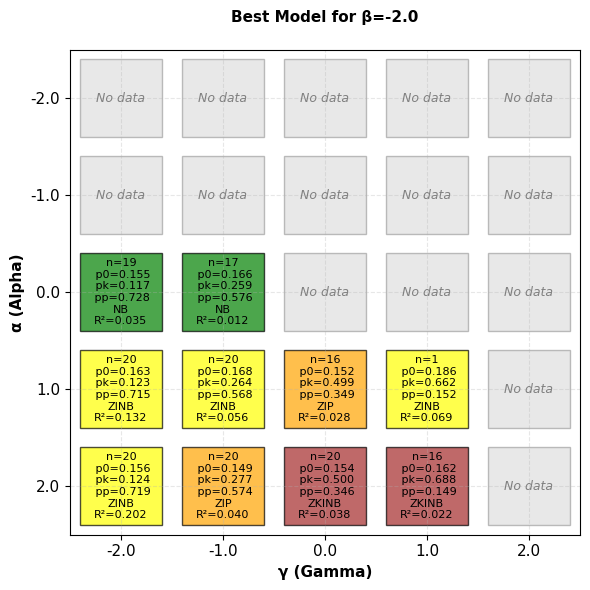

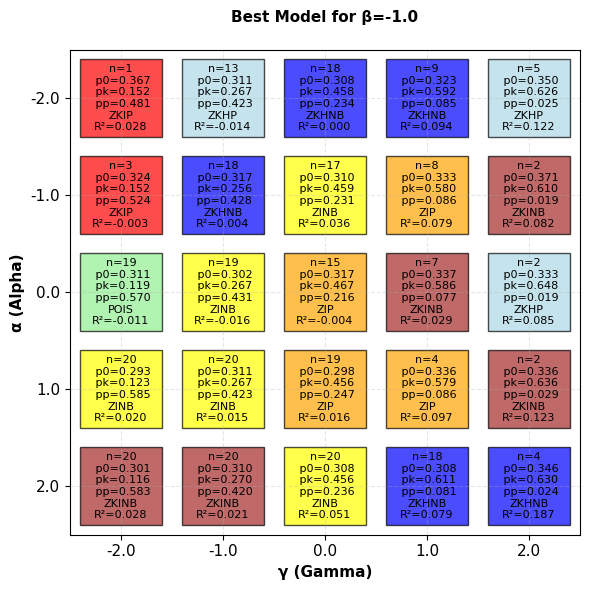

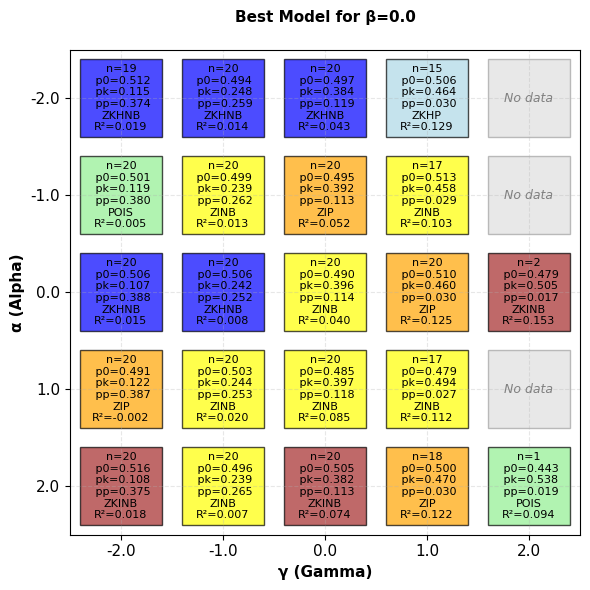

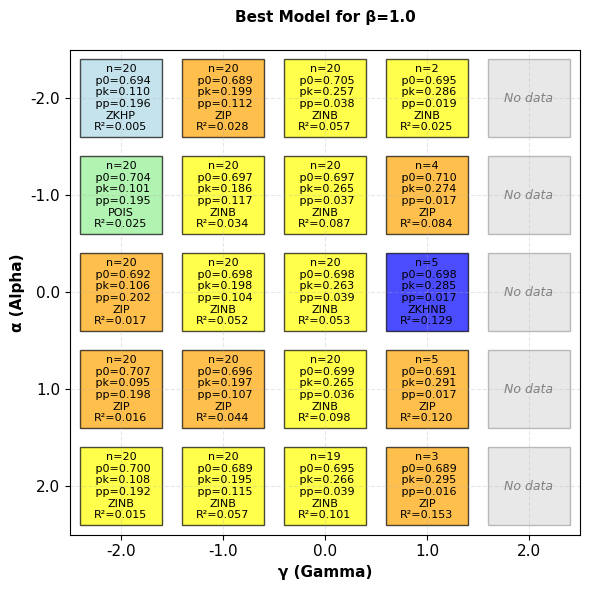

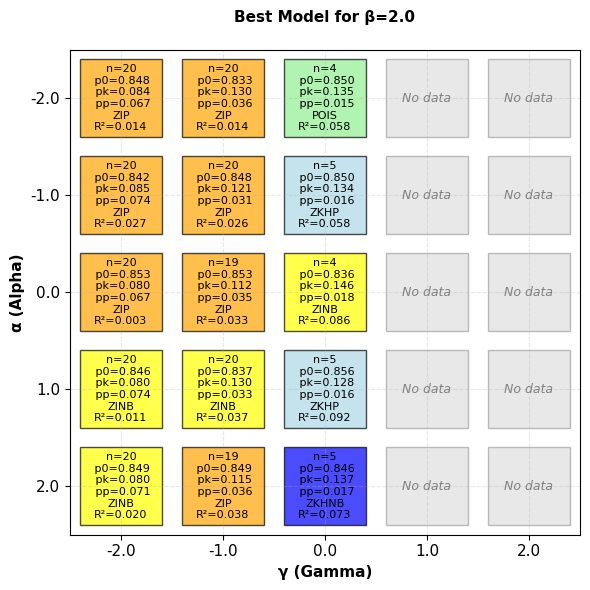

In [39]:
# R2 winners
dfp=results_H
# List of R² columns for different models
r2_columns = ['POISSON_R2', 'NEGATIVE_BINOMIAL_R2', 'ZK_HURDLE_POISSON_R2', 
              'ZK_HURDLE_NB_R2', 'ZINB_R2', 'ZIP_R2', 'ZKINB_R2', 'ZKIP_R2']

# Shorter model names for display (optional)
model_names = ['POIS', 'NB', 'ZKHP', 'ZKHNB', 'ZINB', 'ZIP', 'ZKINB', 'ZKIP']

color=['lightgreen', 'green', 'lightblue', 'blue', 'yellow', 'orange', 'brown', 'red']

# Generate alpha, beta, and gamma values
beta_values = np.linspace(-2, 2, 5)
alphas = np.linspace(-2, 2, 5)
gammas = np.linspace(-2, 2, 5)

sizz = 6
tolerance = 1e-9
m=[]
for beta_idx, beta_val in enumerate(beta_values):
    fig, ax = plt.subplots(figsize=(sizz, sizz))
    
    for i, alpha in enumerate(alphas):
        for j, gamma in enumerate(gammas):
            x_pos = j
            y_pos = len(alphas) - 1 - i
            
            # Use tolerance for float comparison
            mask = (
                (np.abs(dfp['alpha'] - alpha) < tolerance) & 
                (np.abs(dfp['gamma'] - gamma) < tolerance) & 
                (np.abs(dfp['beta'] - beta_val) < tolerance)
            )
            filtered_data = dfp.loc[mask]
            
            p_0_mean=np.mean(filtered_data['p_0'])
            p_k_mean=np.mean(filtered_data['p_k'])
            p_p_mean=np.mean(filtered_data['p_p'])

            if not filtered_data.empty:
                count = len(filtered_data)
                
                # Calculate mean R² for EACH model across the filtered rows
                r2_means = []
                for r2_col in r2_columns:
                    if r2_col in filtered_data.columns:
                        r2_means.append(filtered_data[r2_col].mean())
                    else:
                        r2_means.append(-np.inf)  # Use -inf if column doesn't exist
                
                # Find the model with highest average R²
                best_idx = np.argmax(r2_means)
                best_r2 = r2_means[best_idx]
                best_model = model_names[best_idx] if best_idx < len(model_names) else r2_columns[best_idx]
                m.append({'best_model': best_model,
                          'p_0': p_0_mean,
                          'p_k': p_k_mean,
                          'p_p': p_p_mean})

                # Create text
                text = f"n={count}\n p0={p_0_mean:.3f}\n pk={p_k_mean:.3f}\n pp={p_p_mean:.3f}\n"
                text += f"{best_model}\n"
                text += f"R²={best_r2:.3f}"
                
                # Choose color based on model type (optional)
                
                rect = plt.Rectangle((x_pos - 0.4, y_pos - 0.4), 0.8, 0.8,
                                    facecolor=color[best_idx], edgecolor='black',
                                    alpha=0.7, linewidth=1)
                ax.add_patch(rect)
                
                ax.text(x_pos, y_pos, text,
                       ha='center', va='center',
                       fontsize=8,  # Reduced font size
                       linespacing=1.2)
            else:
                rect = plt.Rectangle((x_pos - 0.4, y_pos - 0.4), 0.8, 0.8,
                                    facecolor='lightgray', edgecolor='gray',
                                    alpha=0.5, linewidth=1)
                ax.add_patch(rect)
                ax.text(x_pos, y_pos, "No data",
                       ha='center', va='center',
                       fontsize=9, color='gray', style='italic')
    
    # Set up the plot
    ax.set_xlim(-0.5, len(gammas) - 0.5)
    ax.set_ylim(-0.5, len(alphas) - 0.5)
    ax.set_xticks(np.arange(len(gammas)))
    ax.set_yticks(np.arange(len(alphas)))
    ax.set_xticklabels([f'{g:.1f}' for g in gammas], fontsize=sizz+5)
    ax.set_yticklabels([f'{a:.1f}' for a in alphas[::-1]], fontsize=sizz+5)
    ax.set_xlabel('γ (Gamma)', fontsize=sizz+5, fontweight='bold')
    ax.set_ylabel('α (Alpha)', fontsize=sizz+5, fontweight='bold')
    ax.set_title(f'Best Model for β={beta_val:.1f}',
                fontsize=sizz+5, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.show()

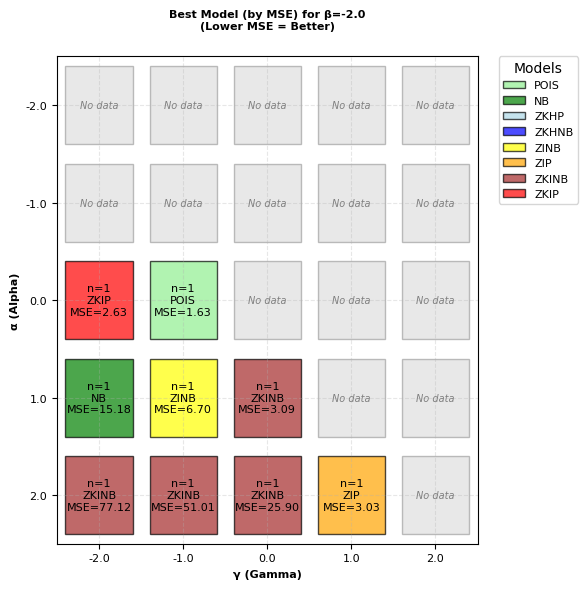

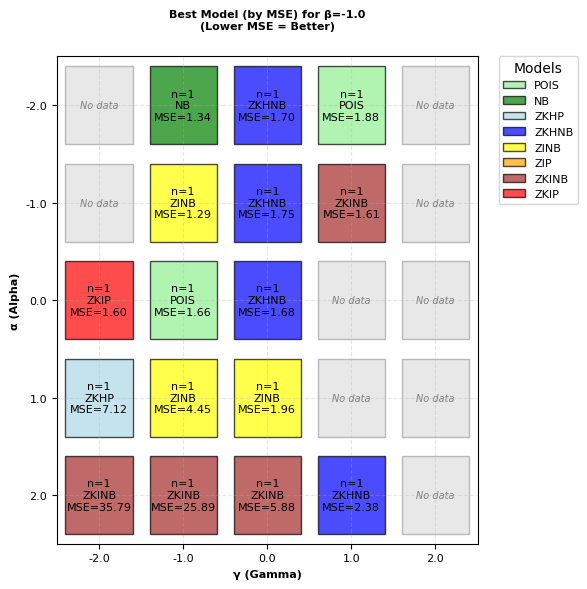

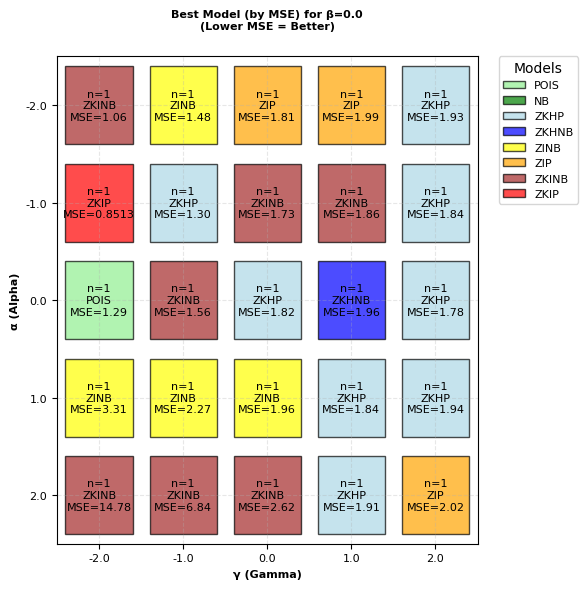

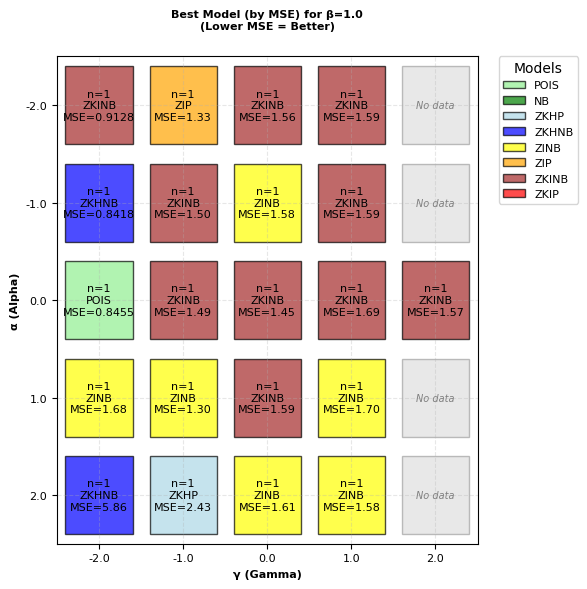

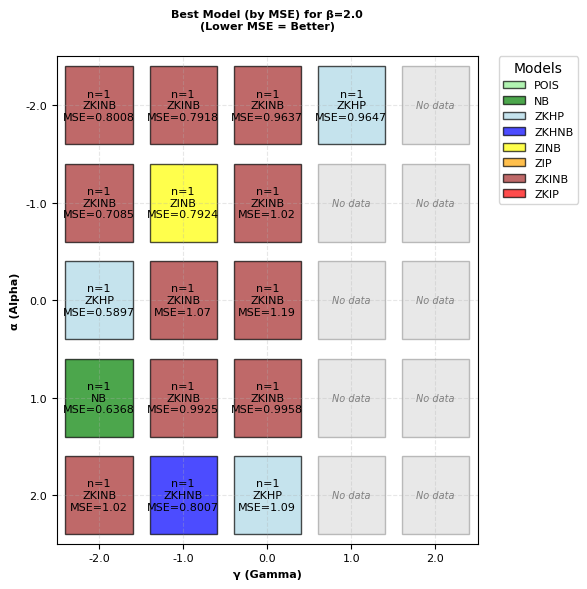


BEST MODEL SUMMARY STATISTICS (BY MSE)

Model frequency (number of cells where model had lowest MSE):
  ZKINB: 35 cells (40.2%)
  ZINB: 15 cells (17.2%)
  ZKHP: 13 cells (14.9%)
  ZKHNB: 8 cells (9.2%)
  POIS: 5 cells (5.7%)
  ZIP: 5 cells (5.7%)
  NB: 3 cells (3.4%)
  ZKIP: 3 cells (3.4%)

Best models by β value:
  β=-2.0: ZKINB (4 cells)
  β=-1.0: ZKHNB (4 cells)
  β=0.0: ZKHP (8 cells)
  β=1.0: ZKINB (10 cells)
  β=2.0: ZKINB (10 cells)

Overall MSE statistics:
  Total cells with valid models: 87
  Minimum MSE: 0.589661
  Maximum MSE: 77.122617
  Mean MSE: 4.577078
  Median MSE: 1.663371

Probability parameter statistics for best models:
  p_0: Mean = 0.538, Std = 0.222
  p_k: Mean = 0.273, Std = 0.156
  p_p: Mean = 0.190, Std = 0.200


In [84]:
# MSE winners
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dfp = results_H

# List of MSE columns for different models (assuming these column names exist)
MSE_columns = ['POISSON_MSE', 'NEGATIVE_BINOMIAL_MSE', 'ZK_HURDLE_POISSON_MSE', 
               'ZK_HURDLE_NB_MSE', 'ZINB_MSE', 'ZIP_MSE', 'ZKINB_MSE', 'ZKIP_MSE']

# Shorter model names for display
model_names = ['POIS', 'NB', 'ZKHP', 'ZKHNB', 'ZINB', 'ZIP', 'ZKINB', 'ZKIP']

# Colors for each model
colors = ['lightgreen', 'green', 'lightblue', 'blue', 'yellow', 'orange', 'brown', 'red']

# Generate alpha, beta, and gamma values
beta_values = np.linspace(-2, 2, 5)
alphas = np.linspace(-2, 2, 5)
gammas = np.linspace(-2, 2, 5)

sizz = 6
tolerance = 1e-6  # Increased tolerance for float comparisons
best_models_summary = []

for beta_idx, beta_val in enumerate(beta_values):
    fig, ax = plt.subplots(figsize=(sizz, sizz))
    
    for i, alpha in enumerate(alphas):
        for j, gamma in enumerate(gammas):
            x_pos = j
            y_pos = len(alphas) - 1 - i
            
            # Use tolerance for float comparison
            mask = (
                (np.abs(dfp['alpha'] - alpha) < tolerance) & 
                (np.abs(dfp['gamma'] - gamma) < tolerance) & 
                (np.abs(dfp['beta'] - beta_val) < tolerance)
            )
            filtered_data = dfp.loc[mask]
            
            # Calculate probability means (outside empty check to avoid error)
            if not filtered_data.empty:
                p_0_mean = np.mean(filtered_data['p_0'])
                p_k_mean = np.mean(filtered_data['p_k'])
                p_p_mean = np.mean(filtered_data['p_p'])
                count = len(filtered_data)
                
                # Calculate mean MSE for EACH model across the filtered rows
                mse_means = []
                valid_models = []  # Track which models have valid data
                
                for idx, mse_col in enumerate(MSE_columns):
                    if mse_col in filtered_data.columns:
                        mean_mse = filtered_data[mse_col].mean()
                        if not np.isnan(mean_mse):
                            mse_means.append(mean_mse)
                            valid_models.append(idx)
                        else:
                            # If NaN, use a large number (not good model)
                            mse_means.append(np.inf)
                            valid_models.append(idx)
                    else:
                        # Column doesn't exist, use large number
                        mse_means.append(np.inf)
                        valid_models.append(idx)
                
                if valid_models:  # If we have any valid models
                    # For MSE: LOWER is better (same as AIC), so we use argmin
                    best_idx = np.argmin(mse_means)
                    best_mse = mse_means[best_idx]
                    
                    # Check if we have a valid MSE (not infinite)
                    if np.isfinite(best_mse):
                        best_model_name = model_names[best_idx] if best_idx < len(model_names) else MSE_columns[best_idx]
                        
                        # Store for summary
                        best_models_summary.append({
                            'beta': beta_val,
                            'alpha': alpha,
                            'gamma': gamma,
                            'best_model': best_model_name,
                            'best_mse': best_mse,
                            'count': count, 
                            'p_0': p_0_mean,
                            'p_k': p_k_mean,
                            'p_p': p_p_mean
                        })
                        
                        # Create text
                        text = f"n={count}\n"
                        text += f"{best_model_name}\n"
                        # Format MSE based on magnitude
                        if best_mse < 0.001:
                            text += f"MSE={best_mse:.2e}"
                        elif best_mse < 1:
                            text += f"MSE={best_mse:.4f}"
                        elif best_mse < 1000:
                            text += f"MSE={best_mse:.2f}"
                        else:
                            text += f"MSE={best_mse:.1e}"
                        
                        # Choose color based on model type
                        color_idx = best_idx % len(colors)  # Ensure within bounds
                        rect_color = colors[color_idx]
                        
                        rect = plt.Rectangle((x_pos - 0.4, y_pos - 0.4), 0.8, 0.8,
                                            facecolor=rect_color, edgecolor='black',
                                            alpha=0.7, linewidth=1)
                        ax.add_patch(rect)
                        
                        ax.text(x_pos, y_pos, text,
                               ha='center', va='center',
                               fontsize=8,
                               linespacing=1.2)
                    else:
                        # No valid MSE values
                        rect = plt.Rectangle((x_pos - 0.4, y_pos - 0.4), 0.8, 0.8,
                                            facecolor='lightgray', edgecolor='gray',
                                            alpha=0.5, linewidth=1)
                        ax.add_patch(rect)
                        ax.text(x_pos, y_pos, "No valid\nMSE",
                               ha='center', va='center',
                               fontsize=7, color='gray')
                else:
                    # No valid models
                    rect = plt.Rectangle((x_pos - 0.4, y_pos - 0.4), 0.8, 0.8,
                                        facecolor='lightgray', edgecolor='gray',
                                        alpha=0.5, linewidth=1)
                    ax.add_patch(rect)
                    ax.text(x_pos, y_pos, "No valid\nmodels",
                           ha='center', va='center',
                           fontsize=7, color='gray')
                    
            else:
                # No data
                rect = plt.Rectangle((x_pos - 0.4, y_pos - 0.4), 0.8, 0.8,
                                    facecolor='lightgray', edgecolor='gray',
                                    alpha=0.5, linewidth=1)
                ax.add_patch(rect)
                ax.text(x_pos, y_pos, "No data",
                       ha='center', va='center',
                       fontsize=7, color='gray', style='italic')
    
    # Set up the plot
    ax.set_xlim(-0.5, len(gammas) - 0.5)
    ax.set_ylim(-0.5, len(alphas) - 0.5)
    ax.set_xticks(np.arange(len(gammas)))
    ax.set_yticks(np.arange(len(alphas)))
    ax.set_xticklabels([f'{g:.1f}' for g in gammas], fontsize=sizz+2)
    ax.set_yticklabels([f'{a:.1f}' for a in alphas[::-1]], fontsize=sizz+2)
    ax.set_xlabel('γ (Gamma)', fontsize=sizz+2, fontweight='bold')
    ax.set_ylabel('α (Alpha)', fontsize=sizz+2, fontweight='bold')
    ax.set_title(f'Best Model (by MSE) for β={beta_val:.1f}\n(Lower MSE = Better)',
                fontsize=sizz+2, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Add legend for model colors
    from matplotlib.patches import Patch
    legend_elements = []
    for i, model in enumerate(model_names):
        if i < len(colors):
            legend_elements.append(Patch(facecolor=colors[i], edgecolor='black', 
                                        alpha=0.7, label=model))
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1), 
              borderaxespad=0., fontsize=8, title='Models')
    
    plt.tight_layout()
    plt.show()

# Print summary statistics
print("\n" + "="*60)
print("BEST MODEL SUMMARY STATISTICS (BY MSE)")
print("="*60)

if best_models_summary:
    summary_df = pd.DataFrame(best_models_summary)
    
    # Count occurrences of each model
    model_counts = summary_df['best_model'].value_counts()
    print("\nModel frequency (number of cells where model had lowest MSE):")
    for model, count in model_counts.items():
        percentage = (count / len(summary_df)) * 100
        print(f"  {model}: {count} cells ({percentage:.1f}%)")
    
    # Best model by beta
    print("\nBest models by β value:")
    for beta_val in beta_values:
        beta_subset = summary_df[summary_df['beta'] == beta_val]
        if not beta_subset.empty:
            beta_counts = beta_subset['best_model'].value_counts()
            best_in_beta = beta_counts.idxmax() if not beta_counts.empty else "None"
            print(f"  β={beta_val:.1f}: {best_in_beta} ({beta_counts.max()} cells)")
    
    # Best MSE statistics
    print(f"\nOverall MSE statistics:")
    print(f"  Total cells with valid models: {len(summary_df)}")
    print(f"  Minimum MSE: {summary_df['best_mse'].min():.6f}")
    print(f"  Maximum MSE: {summary_df['best_mse'].max():.6f}")
    print(f"  Mean MSE: {summary_df['best_mse'].mean():.6f}")
    print(f"  Median MSE: {summary_df['best_mse'].median():.6f}")
    
    # Summary of probability parameters for best models
    print(f"\nProbability parameter statistics for best models:")
    for prob in ['p_0', 'p_k', 'p_p']:
        print(f"  {prob}: Mean = {summary_df[prob].mean():.3f}, Std = {summary_df[prob].std():.3f}")
else:
    print("No valid models found in any cell!")

In [85]:
m=pd.DataFrame(m)
m['best_model'].value_counts()


best_model
ZKINB    35
ZINB     15
ZKHP     13
ZKHNB     8
POIS      5
ZIP       5
NB        3
ZKIP      3
Name: count, dtype: int64

In [86]:
pp=[]
best_models_summary=pd.DataFrame(best_models_summary)
for i in model_names:
    pp.append({'model': i,
               'p_0': best_models_summary.loc[best_models_summary['best_model']==i, 'p_0'].mean(),
               'p_k': best_models_summary.loc[best_models_summary['best_model']==i, 'p_k'].mean(),
               'p_p': best_models_summary.loc[best_models_summary['best_model']==i, 'p_p'].mean()}
              )

In [87]:
pp=pd.DataFrame(pp)
pp

model       p_0       p_k       p_p
0   POIS  0.390571  0.276571  0.332857
1     NB  0.430952  0.155000  0.414048
2   ZKHP  0.574341  0.326593  0.099066
3  ZKHNB  0.496607  0.342857  0.160536
4   ZINB  0.539095  0.252714  0.208190
5    ZIP  0.459143  0.455286  0.085571
6  ZKINB  0.592531  0.241184  0.166286
7   ZKIP  0.320714  0.133095  0.546190